## Phase 2 Project
Please fill out:
* Student name: Joby Varghese
* Student pace: part time
* Scheduled project review date/time: 05 July 2023
* Instructor name: Hardik Idnani
* Blog post URL:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import math

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Indentifying columns with missing values**

In [5]:
df.apply(pd.isnull).sum()/df.shape[0]

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

**Updating the rows where the attributes in the respective column 'waterfront'are missing with 0**

In [6]:
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

**Identified some values in '?' within the column "sqft_basement"**

In [7]:
# Replacing "?" with NaN in 'sqft_basement' column
df['sqft_basement'] = df['sqft_basement'].replace('?', float('nan'))

# Converting 'sqft_basement' column to numeric type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# Calculating the difference between 'sqft_living' and 'sqft_above'
difference = df['sqft_living'] - df['sqft_above']

# Replace NaN values in 'sqft_basement' with the calculated difference
df['sqft_basement'].fillna(difference, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Determination of Correlation between Dependant Variable (Price) & Independant Variables ('sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15')**

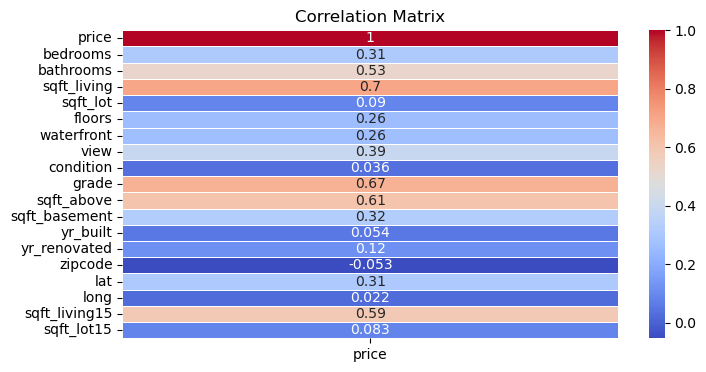

In [10]:
selected_data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
correlation_matrix = selected_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
selected_data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
correlation_matrix = selected_data.corr()

# Filter variables with correlation coefficient less than 0.3 or greater than -0.3
weak_correlation_vars = []
for col in correlation_matrix.columns:
    if abs(correlation_matrix.loc['price', col]) < 0.3:
        weak_correlation_vars.append(col)

print("Variables with correlation coefficient less than 0.3 or greater than -0.3:")
print(weak_correlation_vars)

Variables with correlation coefficient less than 0.3 or greater than -0.3:
['sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15']


Based on the correlation matrix provided above, there is a weak correlation between the Price of a house and both the Sqft_lot and Sqft_lot15 variables. However, it is generally understood that the size of the lot can influence the price of a house. Therefore, it is recommended to retain the Sqft_lot column in the dataset, as it represents the square footage of the land area for the individual house. On the other hand, the Sqft_lot15 column, which represents the average lot size of the surrounding 15 neighboring houses, can be dropped from the dataset as it is expected to have minimal impact on the prediction model.

Sqft_living15 represents the average living space area of the 15 closest neighboring houses. It provides an estimate of the average size of living spaces in nearby houses. While Sqft_living is an important factor in determining the house price, the variable Sqft_living15 is expected to have minimal impact on the prediction model. Therefore, it is advisable to drop this variable from the dataset to simplify the model and reduce potential noise or redundancy in the data.

To enhance the simplicity and minimize potential noise or redundancy in the model, it is advisable to remove certain columns (id, date, view, yr_renovated, zipcode, lat, long). However, even though variables like 'floors', 'waterfront', 'condition', and 'yr_built' exhibit weak correlation with the price, they still hold logical relevance in predicting house prices. Therefore, it is recommended to retain these variables in the dataset for further analysis and testing.

In [12]:
df = df.drop(['id','date','view','yr_renovated', 'zipcode','lat', 'long', 'sqft_lot15','sqft_living15'], axis=1)

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

## Iteration 1: Baseline Model (OLS Statsmodel)

In [14]:
# Fit the OLS model
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built']]
y = df['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_it1 = model.fit()
print(results_it1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3937.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:23:17   Log-Likelihood:            -2.9618e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21586   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.625e+06   1.31e+05     50.477

Based on the provided metrics, the adjusted R-squared value of 64.6% indicates that approximately two-thirds of the variation in house prices can be explained by the independent variables in the model. This suggests that the model has a moderate level of predictive power.

However, there is an illogical representation for the predictor variable 'bedrooms'. The coefficient of -4.25e+04 (42,500) suggests that, according to the model, an increase of one bedroom is associated with a decrease in house price by that amount. Typically, one would expect an increase in the number of bedrooms to positively impact the price of a house. This contradictory result warrants further investigation and consideration.

Additionally, the statistics related to the normality assumption of the regression model (Omnibus, Jarque-Bera, Skewness, and Kurtosis) indicate potential issues. The low p-value for the Omnibus statistic (0.000) suggests that the residuals significantly deviate from a normal distribution. The Jarque-Bera test also confirms a departure from normality. These findings suggest that the model's assumption of normally distributed residuals may not hold, indicating potential limitations or misspecification in the model.

**Assumptions of Linear Regression**

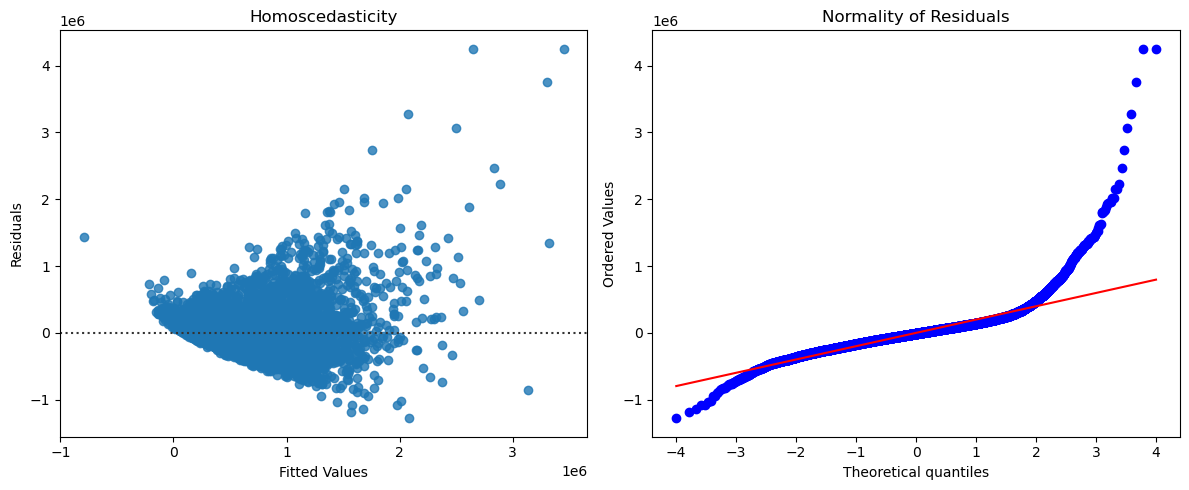

In [15]:
pred_val1 = results_it1.fittedvalues
resid1 = results_it1.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for homoscedasticity
sns.residplot(x=pred_val1, y=resid1, line_kws={'color': 'black'}, ax=ax1)
ax1.set_title('Homoscedasticity')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Q-Q plot for normality
stats.probplot(resid1, dist='norm', plot=ax2)
ax2.set_title('Normality of Residuals')

plt.tight_layout()
plt.show()

The plot of the fitted values against the residuals reveals a distinct cone-shaped pattern. This observation indicates that the assumption of homoscedasticity, which assumes constant variance of residuals across all levels of the independent variable, is violated.

When examining the Q-Q plot, it can be observed that the residual points on the right side of the plot significantly deviate upwards from the theoretical quantiles.This upward deviation suggests that the right tail of the residual distribution has heavier or longer tails compared to the normal distribution. It indicates that the residuals have a tendency to take larger positive values than what would be expected under normality. This deviation from the expected pattern indicates a departure from normality assumption for the residuals.

**Assessment of Residuals: Histogram and QQ Plot for Continuous Variables in Linear Regression Assumptions**

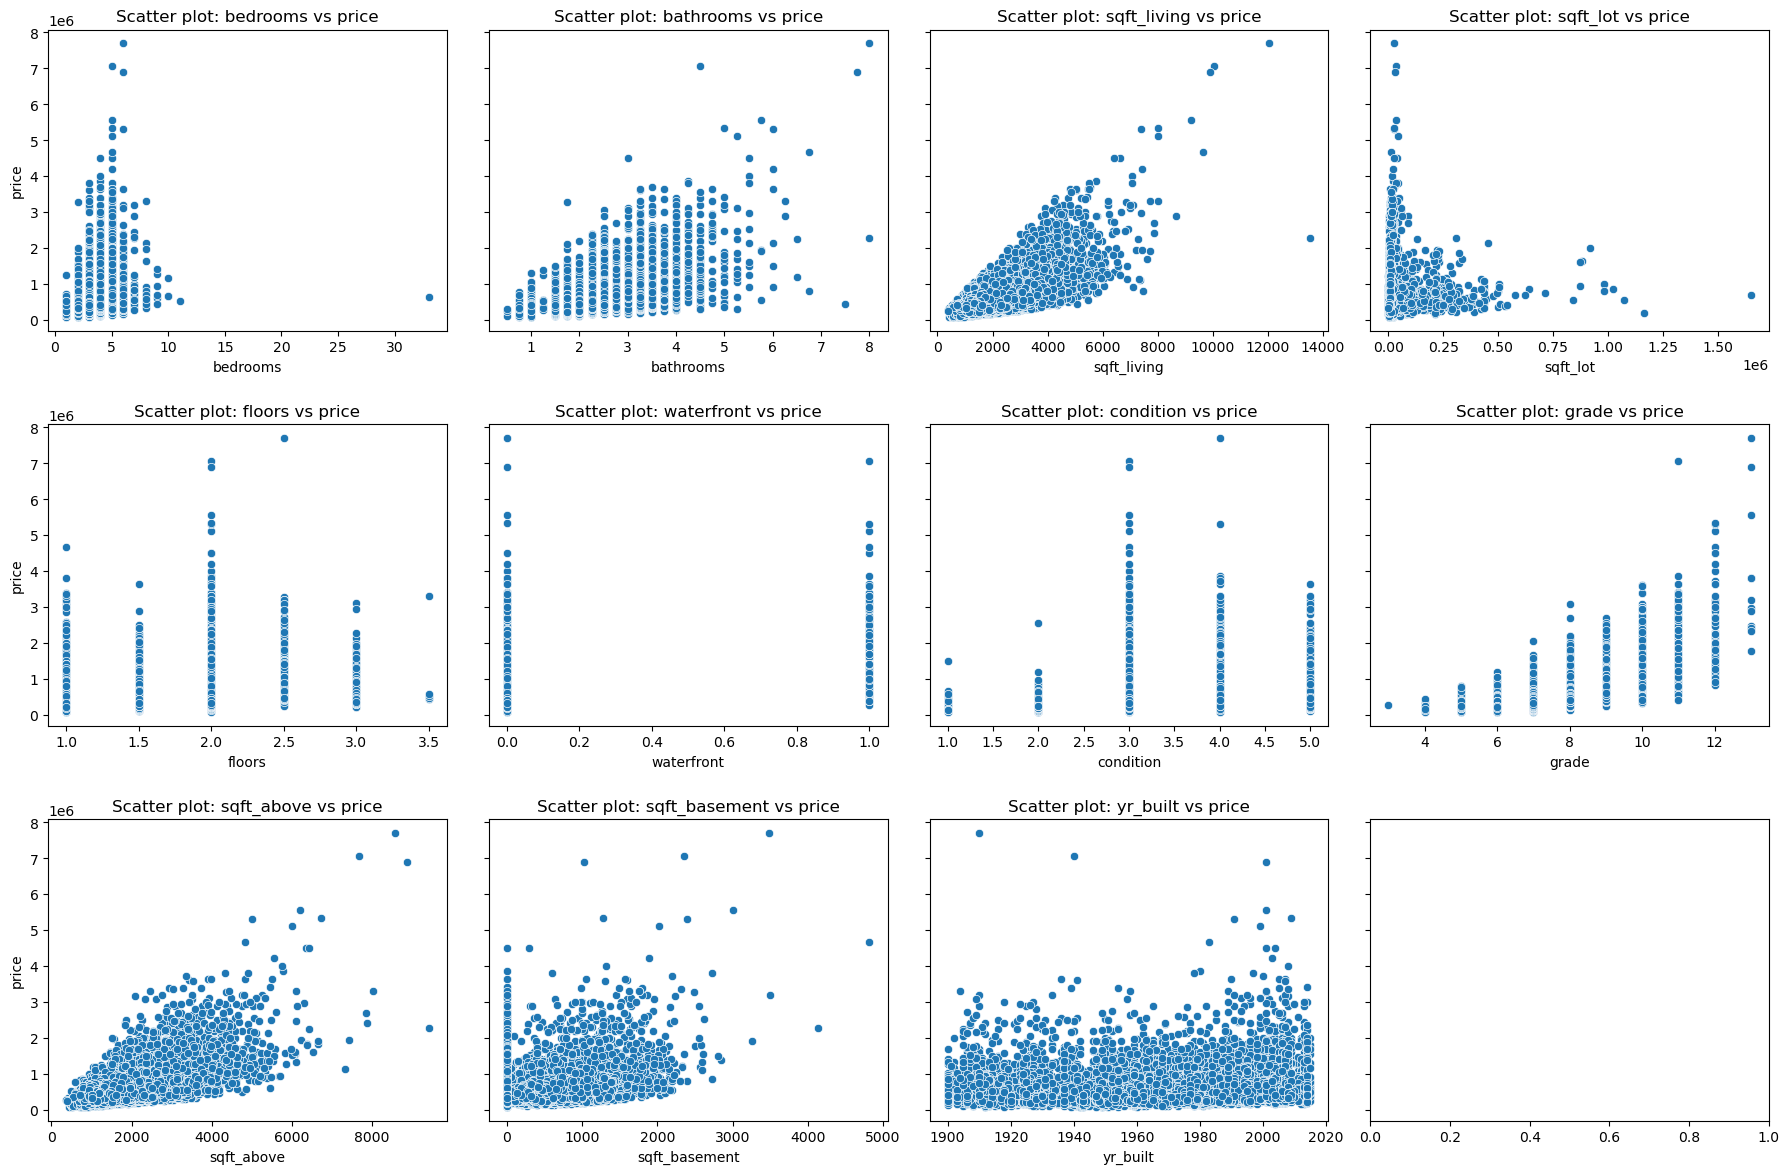

In [16]:
fig, axs = plt.subplots(3, 4, sharey=True, figsize=(18, 12))

# List of predictor variables
predictor_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                       'yr_built']

# Iterate over the predictor variables and create scatter plots
for idx, channel in enumerate(predictor_variables):
    row = idx // 4
    col = idx % 4
    sns.scatterplot(x=channel, y='price', data=df, ax=axs[row, col])
    axs[row, col].set_xlabel(channel)
    axs[row, col].set_ylabel('price')
    axs[row, col].set_title(f'Scatter plot: {channel} vs price')

plt.tight_layout()
plt.show()

'bedrooms', 'bathrooms', 'sqft_living','grade','sqft_above','sqft_basement' shows signs of moderate positive linear relationship with price; however, 'sqft_lot' & 'sqft_basement' shows a weak linear relationship with price.

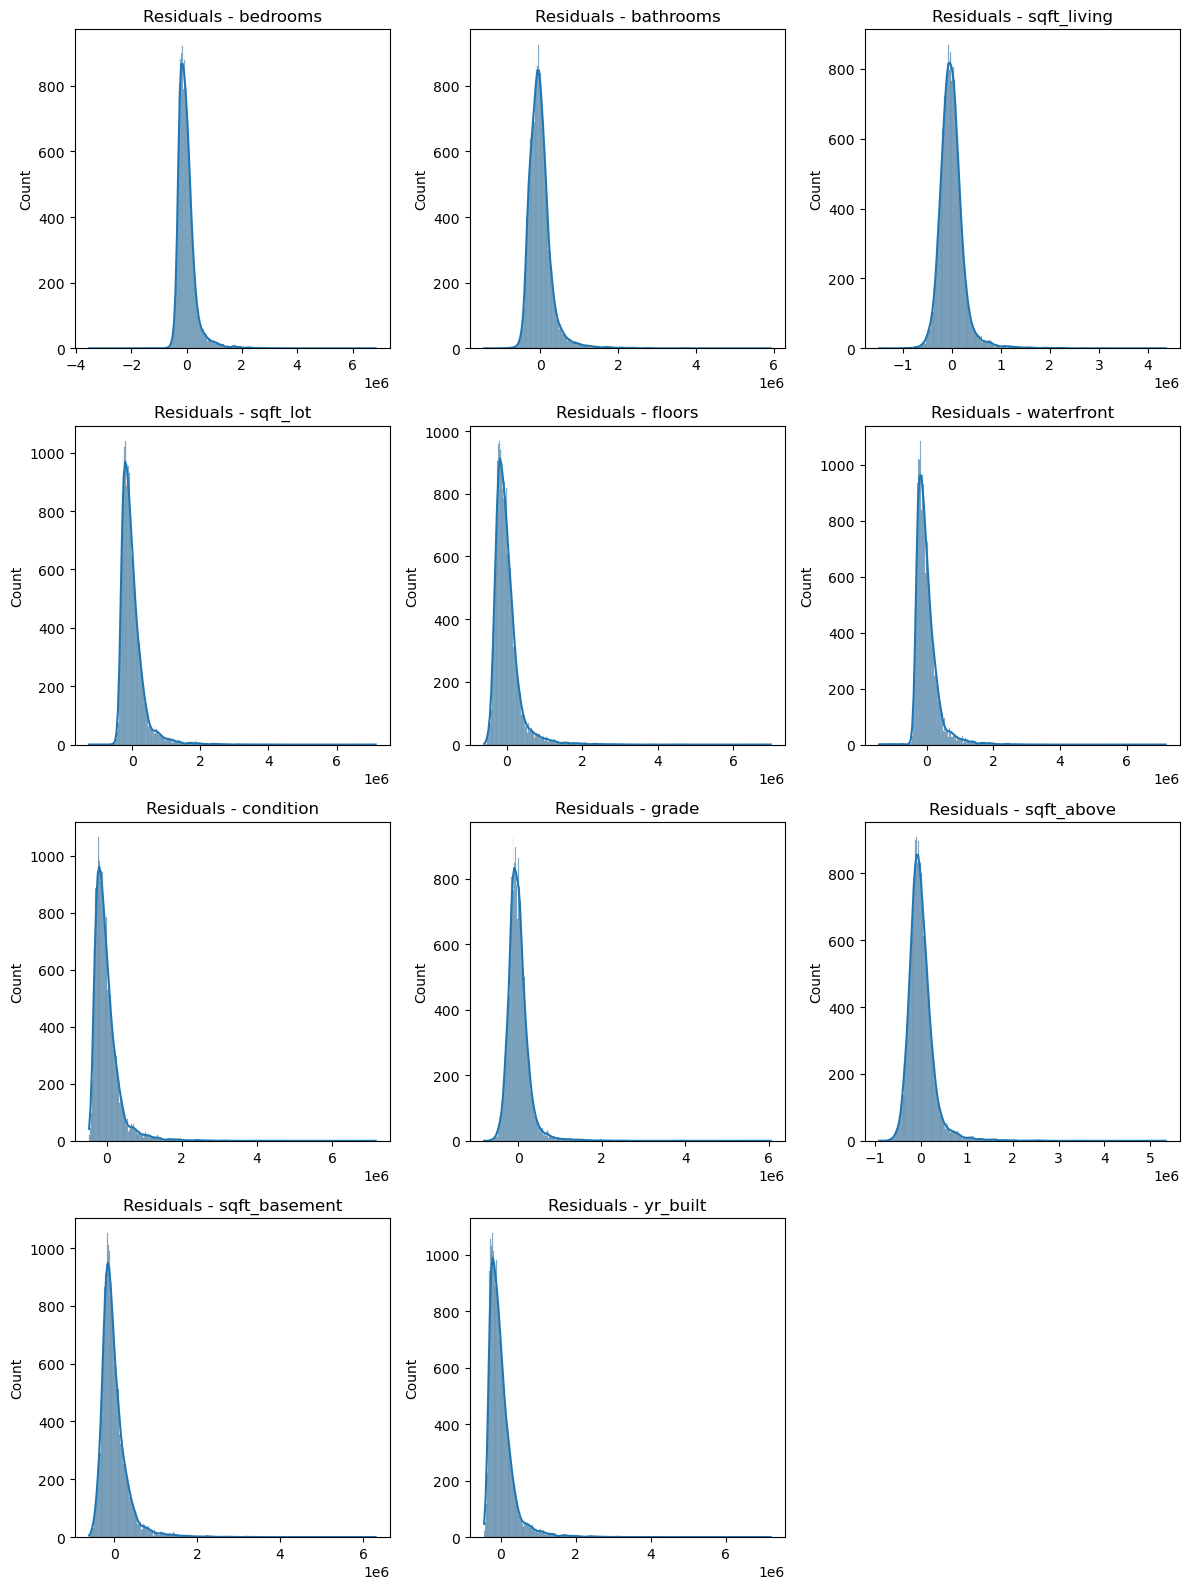

In [17]:
# Build the formulas
formulas = ['price ~ bedrooms', 'price ~ bathrooms', 'price ~ sqft_living',
            'price ~ sqft_lot', 'price ~ floors', 'price ~ waterfront',
            'price ~ condition', 'price ~ grade', 'price ~ sqft_above',
            'price ~ sqft_basement', 'price ~ yr_built']

# Create fitted models in one line
models = []
for formula in formulas:
    model = smf.ols(formula=formula, data=df).fit()
    models.append(model)

# Obtain the residuals for each model
residuals = []
for model in models:
    residuals.append(model.resid)

# Determine the number of rows and columns for the grid
num_plots = len(formulas)
num_rows = (num_plots + 2) // 3  # Add 2 to ensure enough space for the last row
num_cols = min(num_plots, 3)

# Create subplots for the histograms in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot histograms of residuals with KDE curve
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        sns.histplot(residuals[i], kde=True, ax=ax)
        ax.set_title('Residuals - ' + formulas[i].split('~')[1].strip())
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The above histograms showing the residuals skewed towards the right indicate a violation of the assumption of normality of residuals in linear regression.

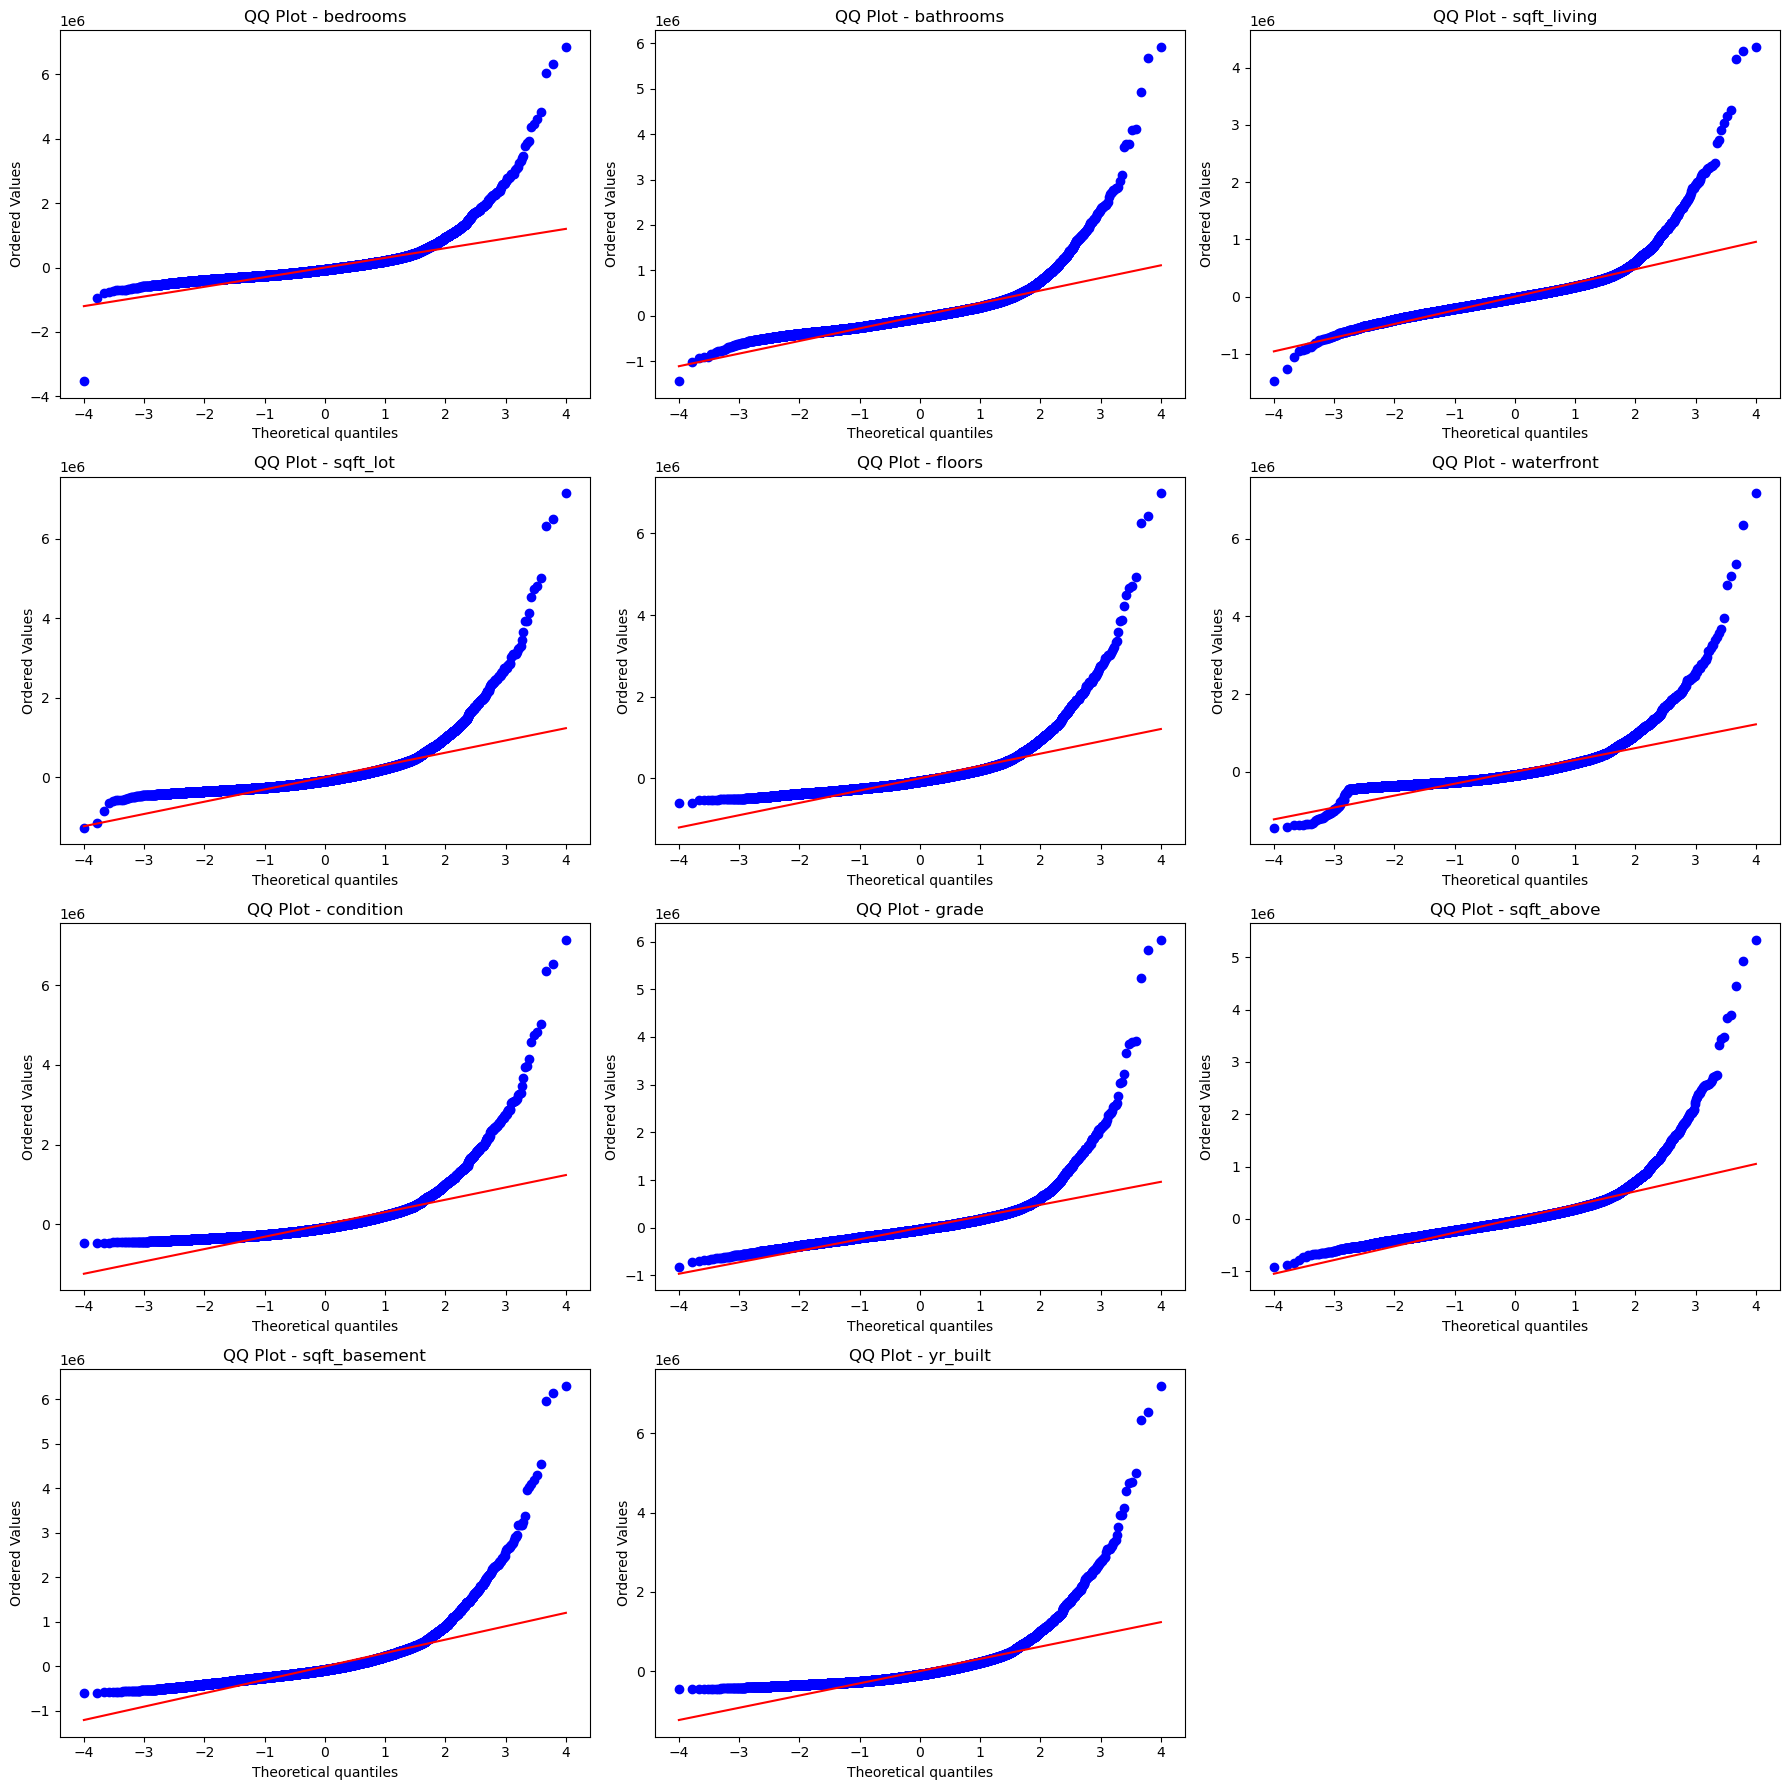

In [18]:
# Create subplots for the QQ plots in a grid layout
fig, axs = plt.subplots(4, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                       'yr_built']

# Plot QQ plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Create a fitted model in one line
        model = smf.ols(formula=f'price ~ {predictor_variables[i]}', data=df).fit()
        # Obtain the residuals
        residuals = model.resid
        # Generate QQ plot
        stats.probplot(residuals, plot=ax)
        ax.set_title(f'QQ Plot - {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The Q-Q plots for all the variables above reveals that the residual data points deviate from the theoretical quantiles at both ends. This indicates a departure from normality in the distribution of the residuals. Specifically, the deviations suggest that the tails of the residual distribution have heavier tails compared to the normal distribution. It suggests a violation of the assumption of normality of residuals in linear regression.

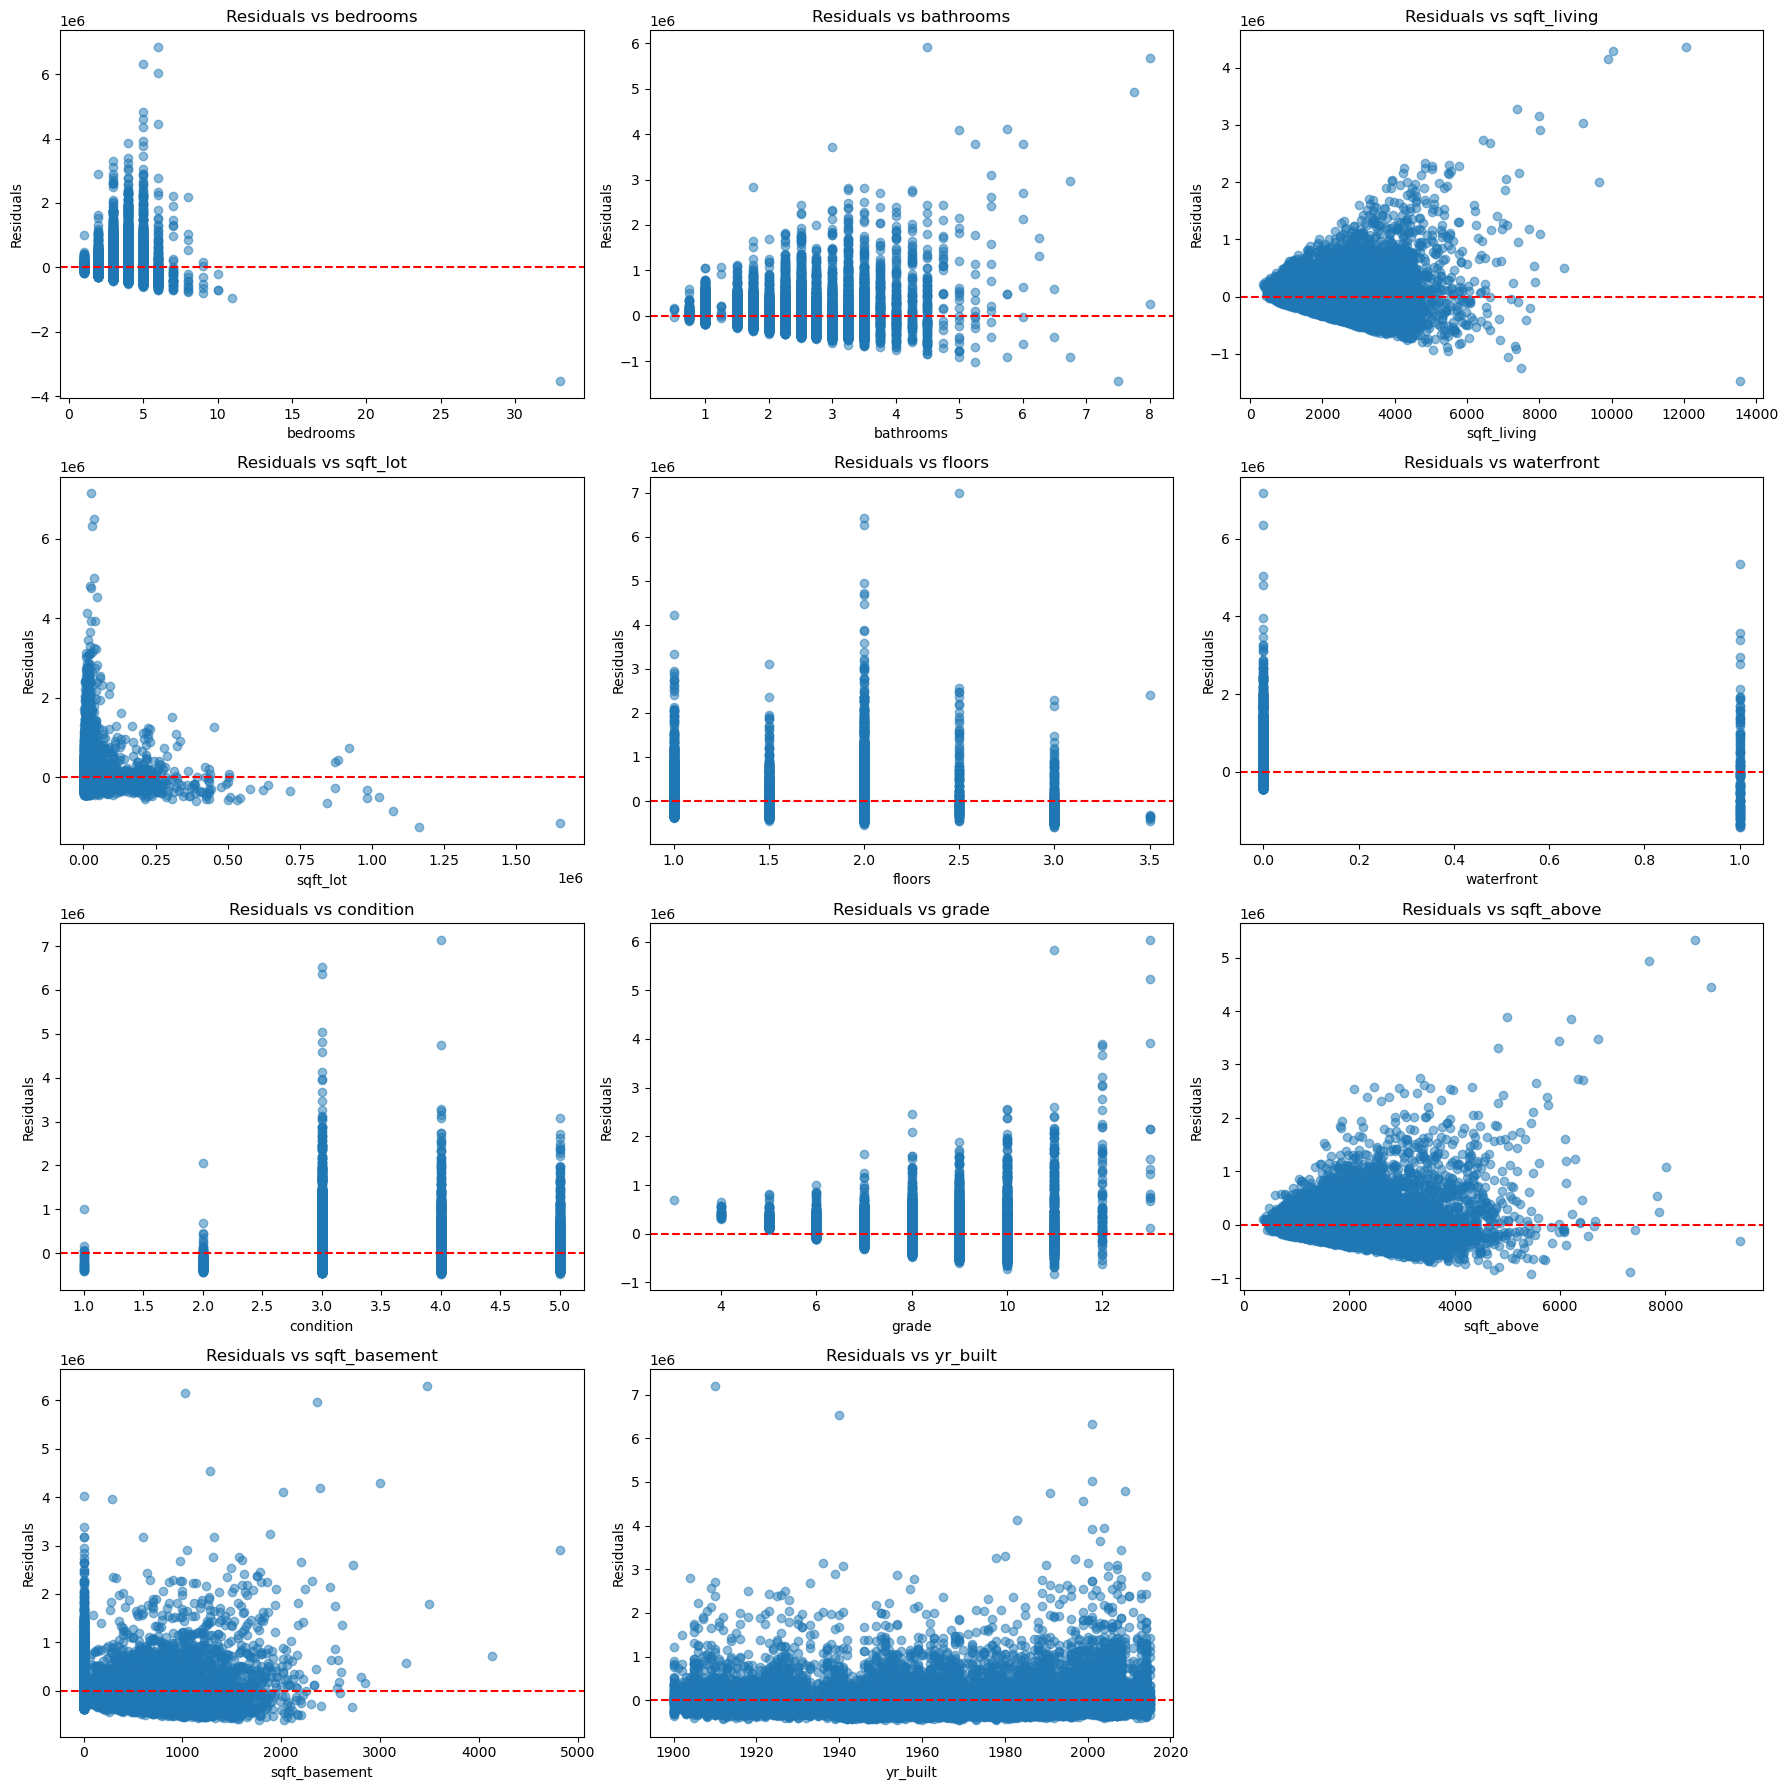

In [19]:
# Create subplots for the scatter plots in a grid layout
fig, axs = plt.subplots(4, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                       'yr_built']

# Plot scatter plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Build the formula
        formula = f'price ~ {predictor_variables[i]}'
        # Create a fitted model
        model = smf.ols(formula=formula, data=df).fit()
        # Obtain the residuals
        residuals = model.resid
        
        # Plot scatter plot
        ax.scatter(df[predictor_variables[i]], residuals, alpha=0.5)
        ax.axhline(y=0, color='red', linestyle='--')
        ax.set_xlabel(predictor_variables[i])
        ax.set_ylabel('Residuals')
        ax.set_title(f'Residuals vs {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

There is a noticeable cone-like shape observed at the extremes of these variables ('bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above') suggesting non-constant variance (heteroscedasticity) and violating the assumption of Homoscedasticity.

## Preparation of Dataset for Iteration 2

In [20]:
df_it1 = df.copy()

In [21]:
df_it1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

**Identification of 'Continuous' & 'Categorical' variables**

In [22]:
 # Check the unique values in each column to determine columns having categorical values
for column in df_it1.columns:
    unique_values = df_it1[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{column}' has {num_unique_values} unique values.")

Column 'price' has 3622 unique values.
Column 'bedrooms' has 12 unique values.
Column 'bathrooms' has 29 unique values.
Column 'sqft_living' has 1034 unique values.
Column 'sqft_lot' has 9776 unique values.
Column 'floors' has 6 unique values.
Column 'waterfront' has 2 unique values.
Column 'condition' has 5 unique values.
Column 'grade' has 11 unique values.
Column 'sqft_above' has 942 unique values.
Column 'sqft_basement' has 306 unique values.
Column 'yr_built' has 116 unique values.


In [23]:
df_it1

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  yr_built  
0             0.0          3      7        1180            0.0      1955  
1             0.0          3      7        2170          400.0      1951  
2             0.0          3      6         770            0.0      1933  
3             0.0          5      7        1050          910.0      1965  
4             0.0          3      8        1680            0.0      1987  
...           ...        ...    ...         ...            ...       ...  
21592         0.0          3      8        1530            0.0      2009  
21593         0.0          3      8        2310            0.0      2014  
21594         0.0          3      7        1020            0.0      2009  
21595         0.0          3      8        1600            0.0      2004  
21596         0.0          3      7        1020            0.0      2008  

[21597 rows x 12 columns]

In [24]:
yr_built_df = df_it1[['yr_built']].copy()
yr_built_df['yr_built'] = yr_built_df['yr_built'].astype(int)

In [25]:
categorical1 = ['waterfront']

In [26]:
categorical2 =['condition']

In [27]:
categorical3 = ['bedrooms','bathrooms', 'floors']

In [28]:
categorical4 = ['yr_built']

**Transformation of Categorical Variables - Creation of Dummy Variables**

In [29]:
dummy_columns = []
dummy_data = []

for col in categorical1:
    dummies = pd.get_dummies(df_it1[col], prefix=col, drop_first=True)
    dummy_columns.extend(list(dummies.columns))
    dummy_data.append(dummies)

# Concatenate the dummy variables into a single DataFrame
dummy_df_cat1 = pd.concat(dummy_data, axis=1)

# Assign column names to the dummy variables
dummy_df_cat1.columns = dummy_columns

In [30]:
dummy_columns = []
dummy_data = []

for col in categorical2:
    dummies = pd.get_dummies(df_it1[col], prefix=col,drop_first=True)
    dummy_columns.extend(list(dummies.columns))
    dummy_data.append(dummies)

# Concatenate the dummy variables into a single DataFrame
dummy_df_cat2 = pd.concat(dummy_data, axis=1)

# Assign column names to the dummy variables
dummy_df_cat2.columns = dummy_columns

In [31]:
## Create a new column 'bedrooms_group' based on 'bedrooms'
# Here the bedrooms are divided in to a group of 1-2, 2-3, 3-4 and 5+
df_it1['bedrooms_group'] = df_it1['bedrooms'].apply(lambda x: '1_2' if x >= 1 and x < 3 
                                                    else ('2_3' if x >= 2 and x < 4 
                                                          else ('3_4' if x >= 3 and x < 5 
                                                                else '5plus')))

# Create dummy variables for 'bedrooms_group'
dummy_df_bedrooms = pd.get_dummies(df_it1['bedrooms_group'], prefix='bedrooms', drop_first=True)



## Create a new column 'bathrooms_group' based on 'bathrooms'
# Here the bathrooms are divided in to a group of 0.5-1, 1-2, 2-3, 3-4, 4-5 and 5+
df_it1['bathrooms_group'] = df_it1['bathrooms'].apply(lambda x: '0.5_1' if x >= 0.5 and x < 1 
                                                      else ('1_2' if x >= 1 and x < 2 
                                                            else ('2_3' if x >= 2 and x < 3 
                                                                  else ('3_4' if x >= 3 and x < 4 
                                                                        else ('4_5' if x >= 4 and x < 5 
                                                                              else '5plus')))))

# Create dummy variables for 'bathrooms_group'
dummy_df_bathrooms = pd.get_dummies(df_it1['bathrooms_group'], prefix='bathrooms', drop_first=True)





## Create a new column 'grade_group' based on 'grade'
# Here the grading is categorised within ranges across 3-5, 5-7, 7-9, 9-11 and 11-13
df_it1['grade_group'] = df_it1['grade'].apply(lambda x: '3_5' if x >= 3 and x < 5 
                                              else ('5_7' if x >= 5 and x < 7 
                                                    else ('7_9' if x >= 7 and x < 9 
                                                          else ('9_11' if x >= 9 and x < 11 
                                                                else '11_13'))))

# Create dummy variables for 'grade_group'
dummy_df_grade = pd.get_dummies(df_it1['grade_group'], prefix='grade', drop_first=True)




## Create a dictionary to define the floor groups
# Here the floor groups are divided in to a ranges from 1-2, 2-3, 3-4 and 4+
floor_groups = {
    '1_2': (1, 2),
    '2_3': (2, 3),
    '3_4': (3, 4),
    '4plus': (4, float('inf'))
}

# Create a function to assign the floor group based on the number of floors
def assign_floor_group(floors):
    for group, (min_floor, max_floor) in floor_groups.items():
        if min_floor <= floors <= max_floor:
            return group

# Create a new column 'floors_group' based on 'floors'
df_it1['floors_group'] = df_it1['floors'].apply(assign_floor_group)

# Create dummy variables for 'floors_group'
dummy_df_floors = pd.get_dummies(df_it1['floors_group'], prefix='floors', drop_first=True)

In [32]:
## The variable 'yr_built' is categorised to range between 1900-1950, 1950-2000 and 2000-2021

# Define the bin edges for 'yr_built' categorization
yr_built_ranges = [1900, 1950, 2000, 2021]

# Categorize the 'yr_built' column using pd.cut()
df_it1['yr_built_category'] = pd.cut(df_it1['yr_built'], bins=yr_built_ranges, include_lowest=True)

# Create dummy variables for 'yr_built_category'
dummy_yr_built = pd.get_dummies(df_it1['yr_built_category'], prefix='yr_built', drop_first=True)

In [33]:
categorical_dummies = pd.concat([dummy_df_bedrooms,dummy_df_bathrooms,dummy_df_floors,dummy_df_grade,dummy_df_cat1,dummy_df_cat2,
                                 dummy_yr_built], axis=1)

In [34]:
df_it1 = df_it1.drop(['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built',
              'bedrooms_group','bathrooms_group','floors_group','yr_built_category','grade_group'], axis=1)

In [35]:
df_it1 = pd.concat([df_it1, categorical_dummies], axis=1)
df_it1.head()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  bedrooms_2_3  \
0  221900.0         1180      5650        1180            0.0             1   
1  538000.0         2570      7242        2170          400.0             1   
2  180000.0          770     10000         770            0.0             0   
3  604000.0         1960      5000        1050          910.0             0   
4  510000.0         1680      8080        1680            0.0             1   

   bedrooms_3_4  bedrooms_5plus  bathrooms_1_2  bathrooms_2_3  ...  grade_5_7  \
0             0               0              1              0  ...          0   
1             0               0              0              1  ...          0   
2             0               0              1              0  ...          1   
3             1               0              0              0  ...          0   
4             0               0              0              1  ...          0   

   grade_7_9  grade_9_11  waterfront_1.0  condition_2  condition_3  \
0          1           0               0            0            1   
1          1           0               0            0            1   
2          0           0               0            0            1   
3          1           0               0            0            0   
4          1           0               0            0            1   

   condition_4  condition_5  yr_built_(1950.0, 2000.0]  \
0            0            0                          1   
1            0            0                          1   
2            0            0                          0   
3            0            1                          1   
4            0            0                          1   

   yr_built_(2000.0, 2021.0]  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 26 columns]

In [36]:
df_it1= df_it1.rename(columns={'yr_built_(1950.0, 2000.0]': 'yr_built_1950_2000',
                        'yr_built_(2000.0, 2021.0]': 'yr_built_2000_2021'})
df_it1.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus',
       'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9',
       'grade_9_11', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021'],
      dtype='object')

**Multicollinearity Check**

In [37]:
# create single dataframe called df_preprocessed
numeric_vars = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus',
       'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9',
       'grade_9_11', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021']
df_it1_preprocessed =df_it1.loc[:, numeric_vars]

df_it1_preprocessed.head()

sqft_living  sqft_lot  sqft_above  sqft_basement  bedrooms_2_3  \
0         1180      5650        1180            0.0             1   
1         2570      7242        2170          400.0             1   
2          770     10000         770            0.0             0   
3         1960      5000        1050          910.0             0   
4         1680      8080        1680            0.0             1   

   bedrooms_3_4  bedrooms_5plus  bathrooms_1_2  bathrooms_2_3  bathrooms_3_4  \
0             0               0              1              0              0   
1             0               0              0              1              0   
2             0               0              1              0              0   
3             1               0              0              0              1   
4             0               0              0              1              0   

   ...  grade_5_7  grade_7_9  grade_9_11  waterfront_1.0  condition_2  \
0  ...          0          1           0               0            0   
1  ...          0          1           0               0            0   
2  ...          1          0           0               0            0   
3  ...          0          1           0               0            0   
4  ...          0          1           0               0            0   

   condition_3  condition_4  condition_5  yr_built_1950_2000  \
0            1            0            0                   1   
1            1            0            0                   1   
2            1            0            0                   0   
3            0            0            1                   1   
4            1            0            0                   1   

   yr_built_2000_2021  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 25 columns]

In [38]:
df_it1_preprocessed.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus',
       'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9',
       'grade_9_11', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021'],
      dtype='object')

In [39]:
df_it1_preprocessed.corr()

sqft_living  sqft_lot  sqft_above  sqft_basement  \
sqft_living            1.000000  0.173453    0.876448       0.435130   
sqft_lot               0.173453  1.000000    0.184139       0.015418   
sqft_above             0.876448  0.184139    1.000000      -0.052156   
sqft_basement          0.435130  0.015418   -0.052156       1.000000   
bedrooms_2_3          -0.273109 -0.015102   -0.225302      -0.145136   
bedrooms_3_4           0.353324  0.026776    0.338496       0.099840   
bedrooms_5plus         0.350678  0.014346    0.245837       0.267618   
bathrooms_1_2         -0.531712 -0.045899   -0.514380      -0.140930   
bathrooms_2_3          0.180457 -0.009446    0.211111      -0.020492   
bathrooms_3_4          0.398553  0.059349    0.338299       0.194015   
bathrooms_4_5          0.315601  0.044236    0.281547       0.128092   
bathrooms_5plus        0.234186  0.063397    0.204202       0.103865   
floors_2_3            -0.001700 -0.036927    0.035993      -0.070831   
floors_3_4             0.007054 -0.005351    0.009136      -0.002453   
grade_3_5             -0.055151  0.000367   -0.048784      -0.023163   
grade_5_7             -0.340853 -0.010331   -0.304281      -0.137954   
grade_7_9             -0.315153 -0.096033   -0.356952       0.013842   
grade_9_11             0.491760  0.086586    0.517420       0.052384   
waterfront_1.0         0.104637  0.021459    0.071778       0.082800   
condition_2           -0.063984  0.037871   -0.057698      -0.024813   
condition_3            0.102061 -0.011589    0.194238      -0.151536   
condition_4           -0.083850  0.013284   -0.142520       0.092597   
condition_5           -0.018284 -0.014452   -0.088596       0.127747   
yr_built_1950_2000     0.034903  0.090730   -0.009638       0.090412   
yr_built_2000_2021     0.215356 -0.044487    0.316272      -0.144755   

                    bedrooms_2_3  bedrooms_3_4  bedrooms_5plus  bathrooms_1_2  \
sqft_living            -0.273109      0.353324        0.350678      -0.531712   
sqft_lot               -0.015102      0.026776        0.014346      -0.045899   
sqft_above             -0.225302      0.338496        0.245837      -0.514380   
sqft_basement          -0.145136      0.099840        0.267618      -0.140930   
bedrooms_2_3            1.000000     -0.624709       -0.286568       0.130483   
bedrooms_3_4           -0.624709      1.000000       -0.214538      -0.278261   
bedrooms_5plus         -0.286568     -0.214538        1.000000      -0.163583   
bathrooms_1_2           0.130483     -0.278261       -0.163583       1.000000   
bathrooms_2_3          -0.005945      0.202119       -0.034137      -0.775306   
bathrooms_3_4          -0.144433      0.112069        0.219799      -0.269349   
bathrooms_4_5          -0.098701      0.021852        0.196866      -0.100138   
bathrooms_5plus        -0.049801     -0.004377        0.120097      -0.043296   
floors_2_3              0.055010     -0.067977       -0.008006      -0.099136   
floors_3_4              0.004214     -0.012314        0.003358      -0.014300   
grade_3_5              -0.030329     -0.024640       -0.011303       0.008377   
grade_5_7              -0.036651     -0.152810       -0.077704       0.341325   
grade_7_9               0.176348     -0.091035       -0.056916       0.081343   
grade_9_11             -0.141737      0.202377        0.092930      -0.328835   
waterfront_1.0         -0.014085     -0.011549        0.019625      -0.028390   
condition_2            -0.008764     -0.020433       -0.020605       0.060517   
condition_3            -0.013520      0.023415       -0.008878      -0.185172   
condition_4             0.027178     -0.028672        0.003817       0.166598   
condition_5            -0.015792      0.014007        0.017212       0.031099   
yr_built_1950_2000      0.142105      0.024162        0.004904      -0.010674   
yr_built_2000_2021     -0.075374      0.081455        0.032001      -0.337027   

                    bathrooms_2_3  bathr

In [40]:
df1=df_it1_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df1.drop_duplicates(inplace=True)

In [41]:
df1[(df1.cc>.75) & (df1.cc <1)]

cc
pairs                                   
(sqft_above, sqft_living)       0.876448
(condition_3, condition_4)      0.812294
(bathrooms_2_3, bathrooms_1_2)  0.775306

In [42]:
# Dropping the one of the variables from each pairs which is having the correlation greater than 0.75 and less than 1
df_it1_preprocessed.drop(columns=['condition_4','sqft_above','bathrooms_2_3'], inplace=True)
df_it1_preprocessed.head()

sqft_living  sqft_lot  sqft_basement  bedrooms_2_3  bedrooms_3_4  \
0         1180      5650            0.0             1             0   
1         2570      7242          400.0             1             0   
2          770     10000            0.0             0             0   
3         1960      5000          910.0             0             1   
4         1680      8080            0.0             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  \
0               0              1              0              0   
1               0              0              0              0   
2               0              1              0              0   
3               0              0              1              0   
4               0              0              0              0   

   bathrooms_5plus  ...  grade_3_5  grade_5_7  grade_7_9  grade_9_11  \
0                0  ...          0          0          1           0   
1                0  ...          0          0          1           0   
2                0  ...          0          1          0           0   
3                0  ...          0          0          1           0   
4                0  ...          0          0          1           0   

   waterfront_1.0  condition_2  condition_3  condition_5  yr_built_1950_2000  \
0               0            0            1            0                   1   
1               0            0            1            0                   1   
2               0            0            1            0                   0   
3               0            0            0            1                   1   
4               0            0            1            0                   1   

   yr_built_2000_2021  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 22 columns]

In [43]:
df_it1 = df_it1.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus',
       'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9',
       'grade_9_11', 'waterfront_1.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021'],axis=1)

In [44]:
df_it1 = pd.concat([df_it1, df_it1_preprocessed], axis=1)
df_it1.head()

price  sqft_living  sqft_lot  sqft_basement  bedrooms_2_3  bedrooms_3_4  \
0  221900.0         1180      5650            0.0             1             0   
1  538000.0         2570      7242          400.0             1             0   
2  180000.0          770     10000            0.0             0             0   
3  604000.0         1960      5000          910.0             0             1   
4  510000.0         1680      8080            0.0             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  ...  \
0               0              1              0              0  ...   
1               0              0              0              0  ...   
2               0              1              0              0  ...   
3               0              0              1              0  ...   
4               0              0              0              0  ...   

   grade_3_5  grade_5_7  grade_7_9  grade_9_11  waterfront_1.0  condition_2  \
0          0          0          1           0               0            0   
1          0          0          1           0               0            0   
2          0          1          0           0               0            0   
3          0          0          1           0               0            0   
4          0          0          1           0               0            0   

   condition_3  condition_5  yr_built_1950_2000  yr_built_2000_2021  
0            1            0                   1                   0  
1            1            0                   1                   0  
2            1            0                   0                   0  
3            0            1                   1                   0  
4            1            0                   1                   0  

[5 rows x 23 columns]

As 'sqft_above' has been excluded from the dataset, the inclusion of 'sqft_basement' by itself becomes irrelevant and may not provide meaningful information for the analysis.

In [45]:
df_it1 = df_it1.drop(['sqft_basement'], axis=1)

**Transformation of Continuous Variables - Log Transformation**

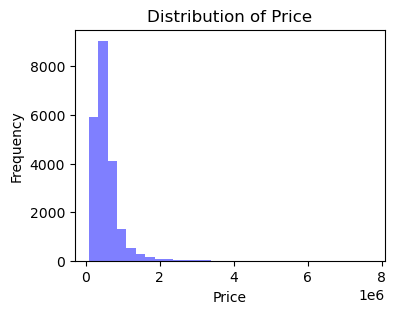

In [46]:
# Plot histogram of 'price'
plt.figure(figsize=(4, 3))
plt.hist(df_it1['price'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

Based on the given illustration, the dependent variable 'price' does not exhibit a normal distribution. The distribution appears to be skewed towards the right (positively skewed), possibly due to the presence of extreme values in the higher end of the distribution.

To address this issue and bring the distribution of the data closer to normality, a potential solution could be to apply a log transformation to the 'price' variable. Log transformation often helps in reducing the impact of extreme values and can result in a more symmetric distribution. By taking the logarithm of the 'price' variable, it is possible to mitigate the positive skewness and achieve a distribution that better adheres to the assumptions of normality.

In [47]:
df_it1['price'] = np.log(df_it1['price'])

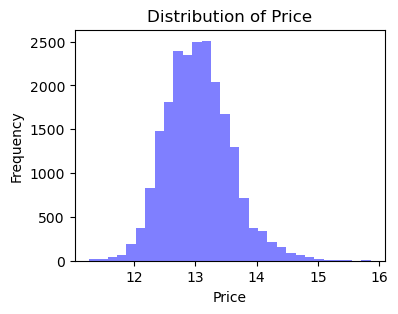

In [48]:
# Plot histogram of 'price'
plt.figure(figsize=(4, 3))
plt.hist(df_it1['price'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

After applying the log transformation to the dependent variable 'price', the histogram of the transformed data points shows a distribution that closely resembles a normal distribution pattern. The log transformation has successfully mitigated the positive skewness observed in the original 'price' variable and has resulted in a distribution that aligns more closely with the assumptions of normality.

In [49]:
continuous = ['sqft_living','sqft_lot']

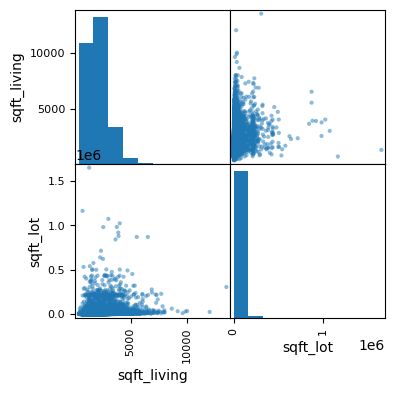

In [50]:
pd.plotting.scatter_matrix(df_it1[continuous], figsize=(4,4));

Both 'sqft_living' & 'sqft_lot' are positively skewed

In [51]:
# Log Transformation
for feat in continuous:
    df_it1[feat] = df_it1[feat].map(lambda x: np.log(x))

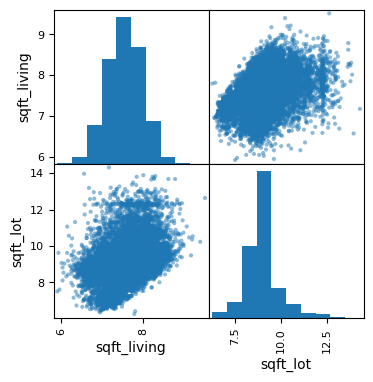

In [52]:
pd.plotting.scatter_matrix(df_it1[continuous], figsize=(4,4));

Similarly, for the continuous independent variables 'sqft_living' and 'sqft_lot', which initially exhibited positive skewness, applying a log transformation has proven effective in reducing the influence of extreme values. As a result, the log-transformed data points for these variables now demonstrate distributions that closely resemble a normal distribution pattern. The log transformation has successfully addressed the positive skewness observed in the original variables and has resulted in distributions that align more closely with the assumptions of normality.

## Iteration 2: Model (OLS Statsmodel) + Transformation 1

In [53]:
df_it1.columns

Index(['price', 'sqft_living', 'sqft_lot', 'bedrooms_2_3', 'bedrooms_3_4',
       'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4', 'bathrooms_4_5',
       'bathrooms_5plus', 'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7',
       'grade_7_9', 'grade_9_11', 'waterfront_1.0', 'condition_2',
       'condition_3', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021'],
      dtype='object')

**Model after performing Muilticollinearity Checks and dealing with Categorical & Continuous Variables**

In [54]:
# Fit the OLS model
X = df_it1[['sqft_living', 'sqft_lot', 'bedrooms_2_3', 'bedrooms_3_4',
       'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4', 'bathrooms_4_5',
       'bathrooms_5plus', 'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7',
       'grade_7_9', 'grade_9_11', 'waterfront_1.0', 'condition_2',
       'condition_3', 'condition_5', 'yr_built_1950_2000',
       'yr_built_2000_2021']]
y = df_it1['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_it2 = model.fit()
print(results_it2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1639.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:23:37   Log-Likelihood:                -6494.9
No. Observations:               21597   AIC:                         1.303e+04
Df Residuals:                   21575   BIC:                         1.321e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4881      0

In the Iteration 2, the Adjusted R-Squared is 61.4% as compared to the Adjusted R-Squared of 64.6% from the Iteration 1. his suggests that the additional independent variables added in Iteration 2 did not significantly improve the model's fit.

In Iteration 1, the F-statistic is 3937 with a p-value of 0.00. In Iteration 2, the F-statistic is 1639 with a p-value of 0.00. Both models have a significant F-statistic, indicating that at least some of the independent variables are related to house prices.

Overall, comparing the diagnostic tests, Iteration 2 shows improvements in terms of normality and symmetry of the residuals compared to Iteration 1. The Omnibus, Kurtosis, Skew, and Jarque-Bera values in Iteration 2 indicate a better fit to a normal distribution, while Iteration 1 demonstrates larger deviations from normality. However, it's important to note that there may still be room for improvement, and further analysis and refinement of the model may be necessary.

**Assumptions of Linear Regression**

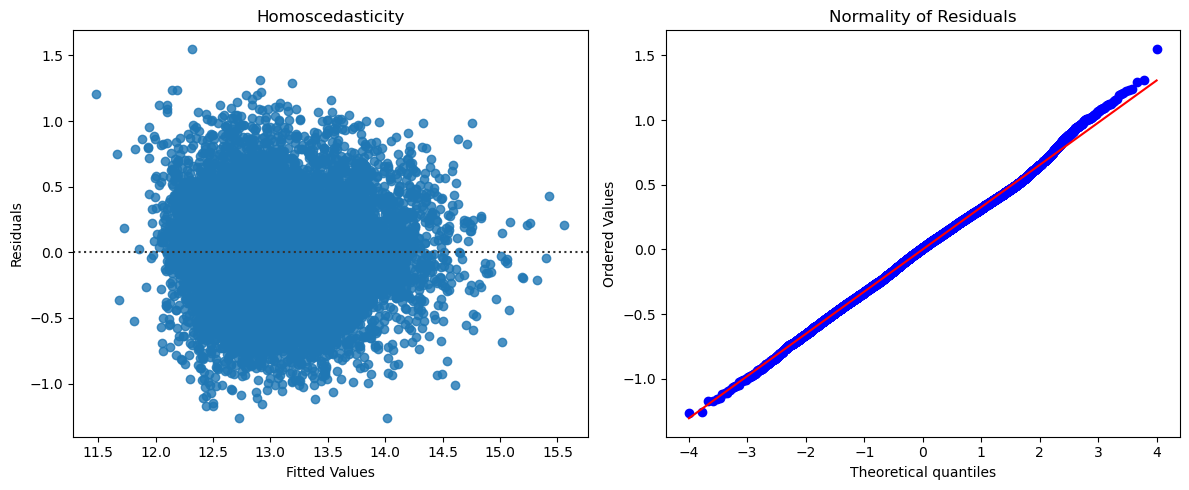

In [55]:
pred_val2 = results_it2.fittedvalues
resid2 = results_it2.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for homoscedasticity
sns.residplot(x=pred_val2, y=resid2, line_kws={'color': 'black'}, ax=ax1)
ax1.set_title('Homoscedasticity')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Q-Q plot for normality
stats.probplot(resid2, dist='norm', plot=ax2)
ax2.set_title('Normality of Residuals')

plt.tight_layout()
plt.show()

The scatter plot shows the relationship between the predicted values and the residuals of the model. In this plot, the data points are evenly spread around the line of best fit, indicating a roughly constant spread of residuals. This pattern suggests that the assumption of homoscedasticity, which assumes constant variance, holds true in this case.

The Q-Q plot of the residuals in comparison to the previous model shows that the residuals in the current model are relatively close to a normal distribution. However, there is a very slight deviation of the tails from the diagonal line or theoretical quantiles, indicating a potential departure from perfect normality. This deviation, when compared to the model from Iteration 1, suggests that the current model's residuals may exhibit a slightly better fit to a normal distribution.

**Assessment of Residuals: Histogram and QQ Plot for Continuous Variables in Linear Regression Assumptions**

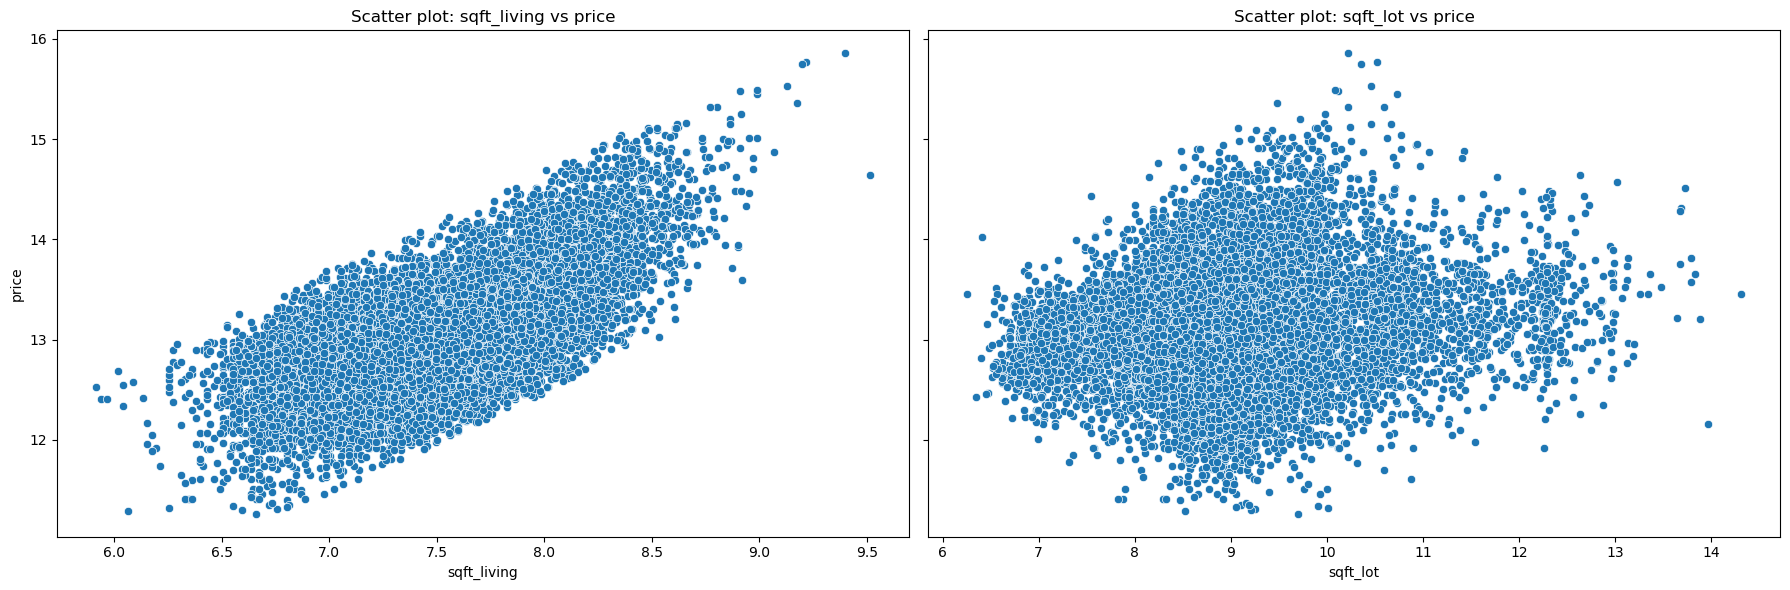

In [56]:
# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot']

# Create subplots for the scatter plots
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))

# Iterate over the predictor variables and create scatter plots
for idx, channel in enumerate(predictor_variables):
    sns.scatterplot(x=channel, y='price', data=df_it1, ax=axs[idx])
    axs[idx].set_xlabel(channel)
    axs[idx].set_ylabel('price')
    axs[idx].set_title(f'Scatter plot: {channel} vs price')

plt.tight_layout()
plt.show()

Even after transformation, the relationship between sqft_living and price still appears to be positive and linear. This indicates that as the square footage of the living area increases, the price tends to increase as well. The transformation applied to the variables might have reduced the impact of extreme values and improved the linearity of the relationship, but the overall positive trend remains.

There doesn't seem to be an improvement in the linear relationship between sqft_lot and price, which is illogical since an increase in the square footage of the lot typically correlates with an increase in price. However, this lack of improvement might be attributed to the dataset not containing sufficient or appropriate data to support this logical reasoning. It's important to consider other factors that could influence the relationship between sqft_lot and price, such as location, amenities, and market conditions. 

In [57]:
df_it1 = df_it1.rename(columns={'waterfront_1.0': 'waterfront_1'})

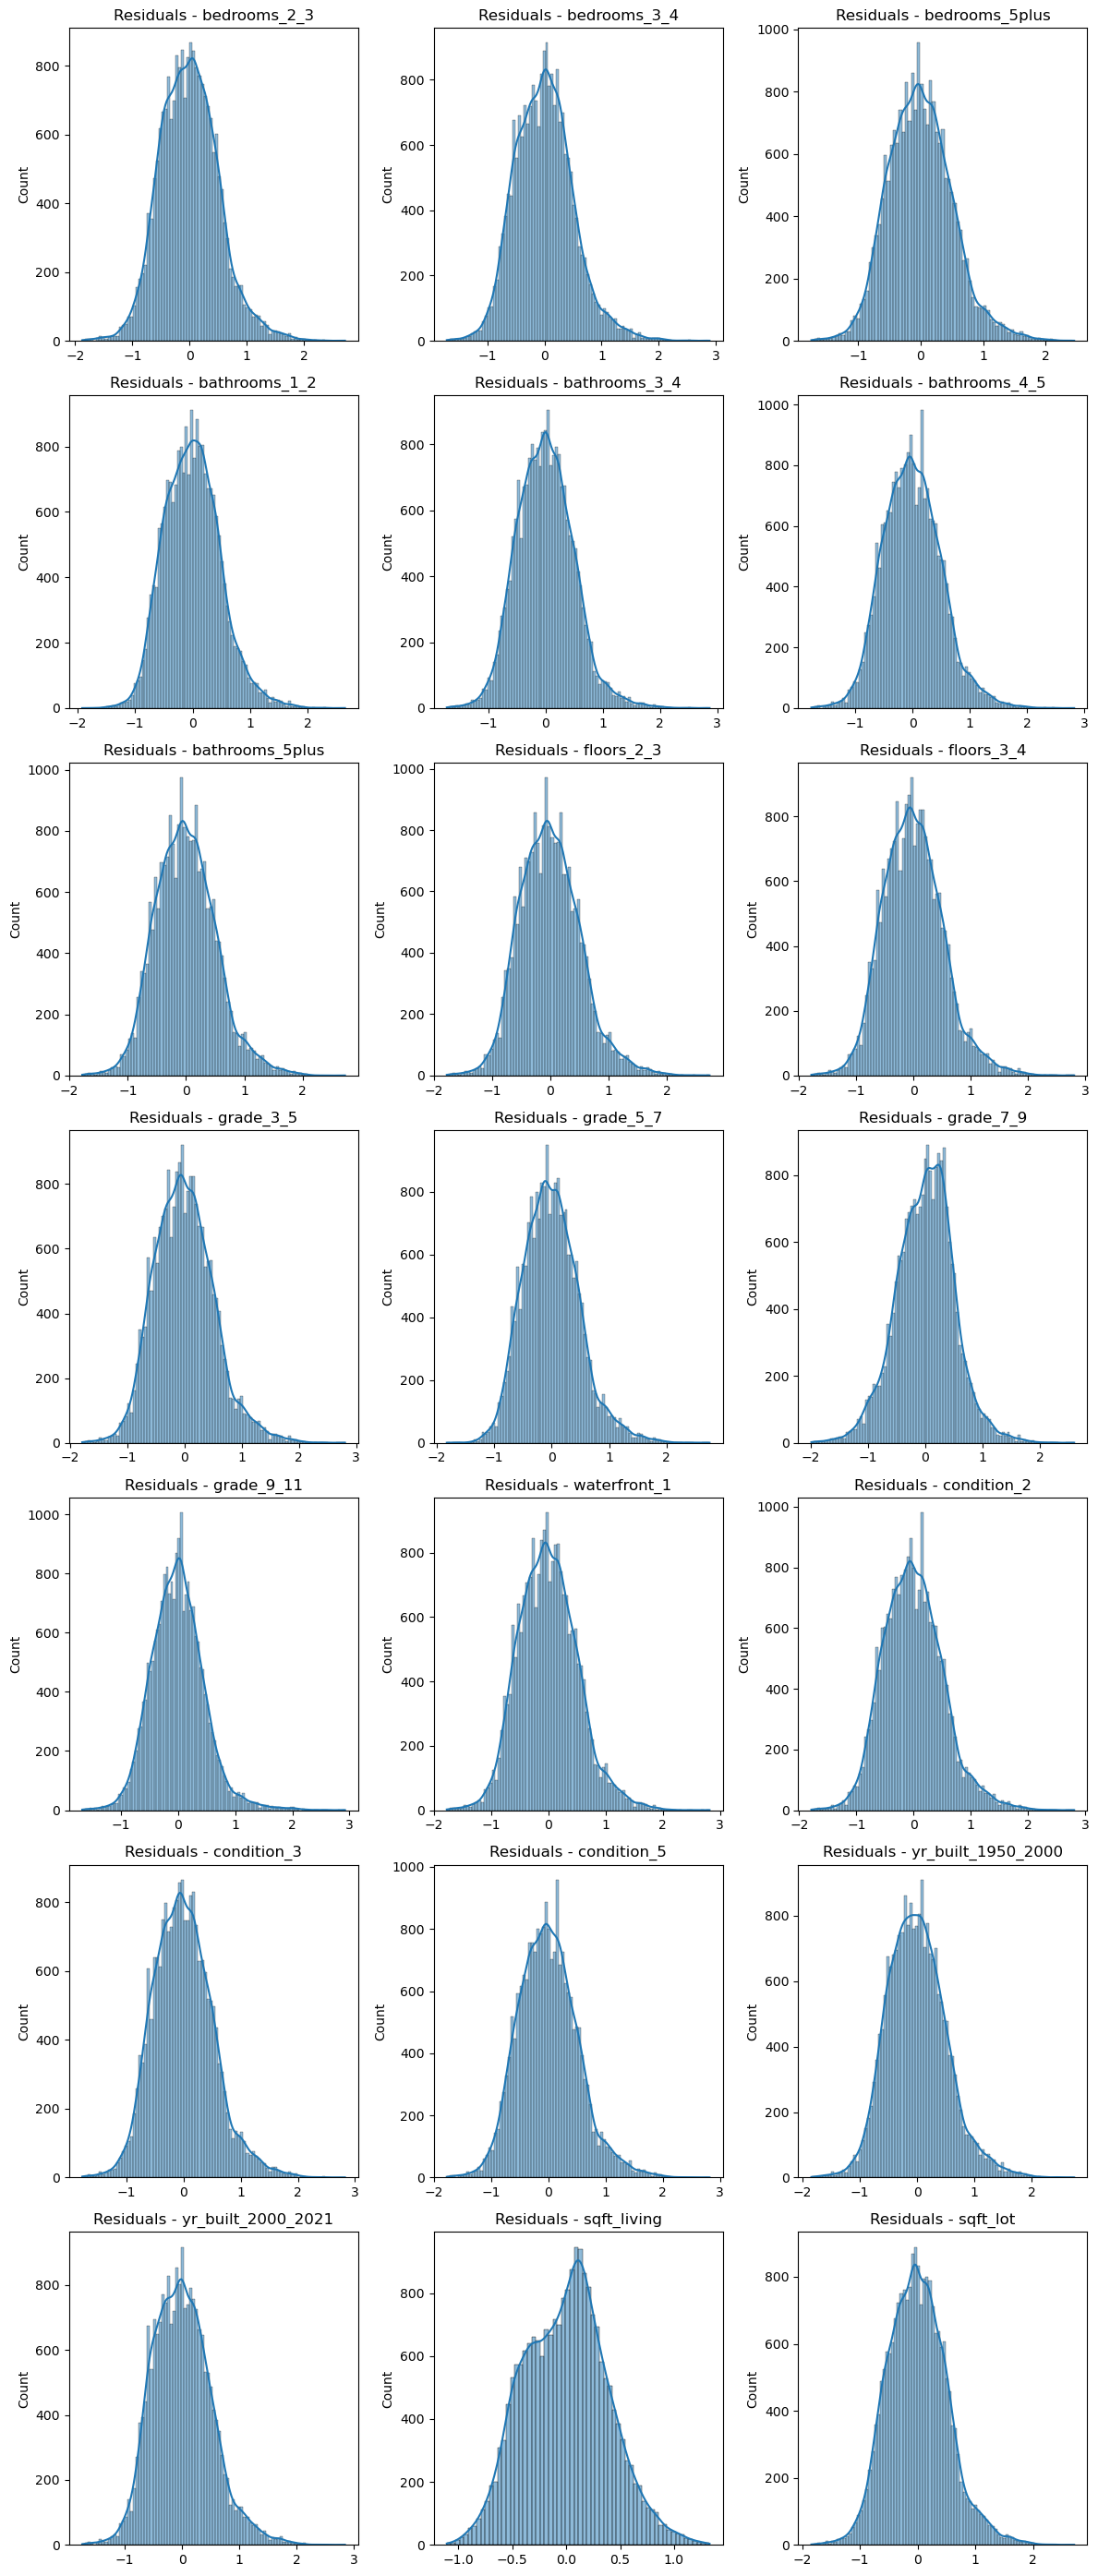

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Build the formulas
formulas = ['price ~ bedrooms_2_3', 'price ~ bedrooms_3_4', 'price ~ bedrooms_5plus',
            'price ~ bathrooms_1_2', 'price ~ bathrooms_3_4', 'price ~ bathrooms_4_5', 'price ~ bathrooms_5plus',
            'price ~ floors_2_3', 'price ~ floors_3_4',
            'price ~ grade_3_5', 'price ~ grade_5_7', 'price ~ grade_7_9', 'price ~ grade_9_11',
            'price ~ waterfront_1', 'price ~ condition_2', 'price ~ condition_3', 'price ~ condition_5',
            'price ~ yr_built_1950_2000', 'price ~ yr_built_2000_2021',
            'price ~ sqft_living', 'price ~ sqft_lot']

# Create fitted models in one line
models = [smf.ols(formula=formula, data=df_it1).fit() for formula in formulas]

# Obtain the residuals for each model
residuals = [model.resid for model in models]

# Determine the number of rows and columns for the grid
num_plots = len(formulas)
num_rows = (num_plots + 2) // 3  # Add 2 to ensure enough space for the last row
num_cols = min(num_plots, 3)

# Create subplots for the histograms in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot histograms of residuals with KDE curve
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        sns.histplot(residuals[i], kde=True, ax=ax)
        ax.set_title('Residuals - ' + formulas[i].split('~')[1].strip())
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The histograms of residuals for the current predictors display a more symmetrical distribution compared to the histograms observed in the model from Iteration 1. This indicates an improvement in the distribution of residuals, suggesting that the current model has achieved a better fit to the data.

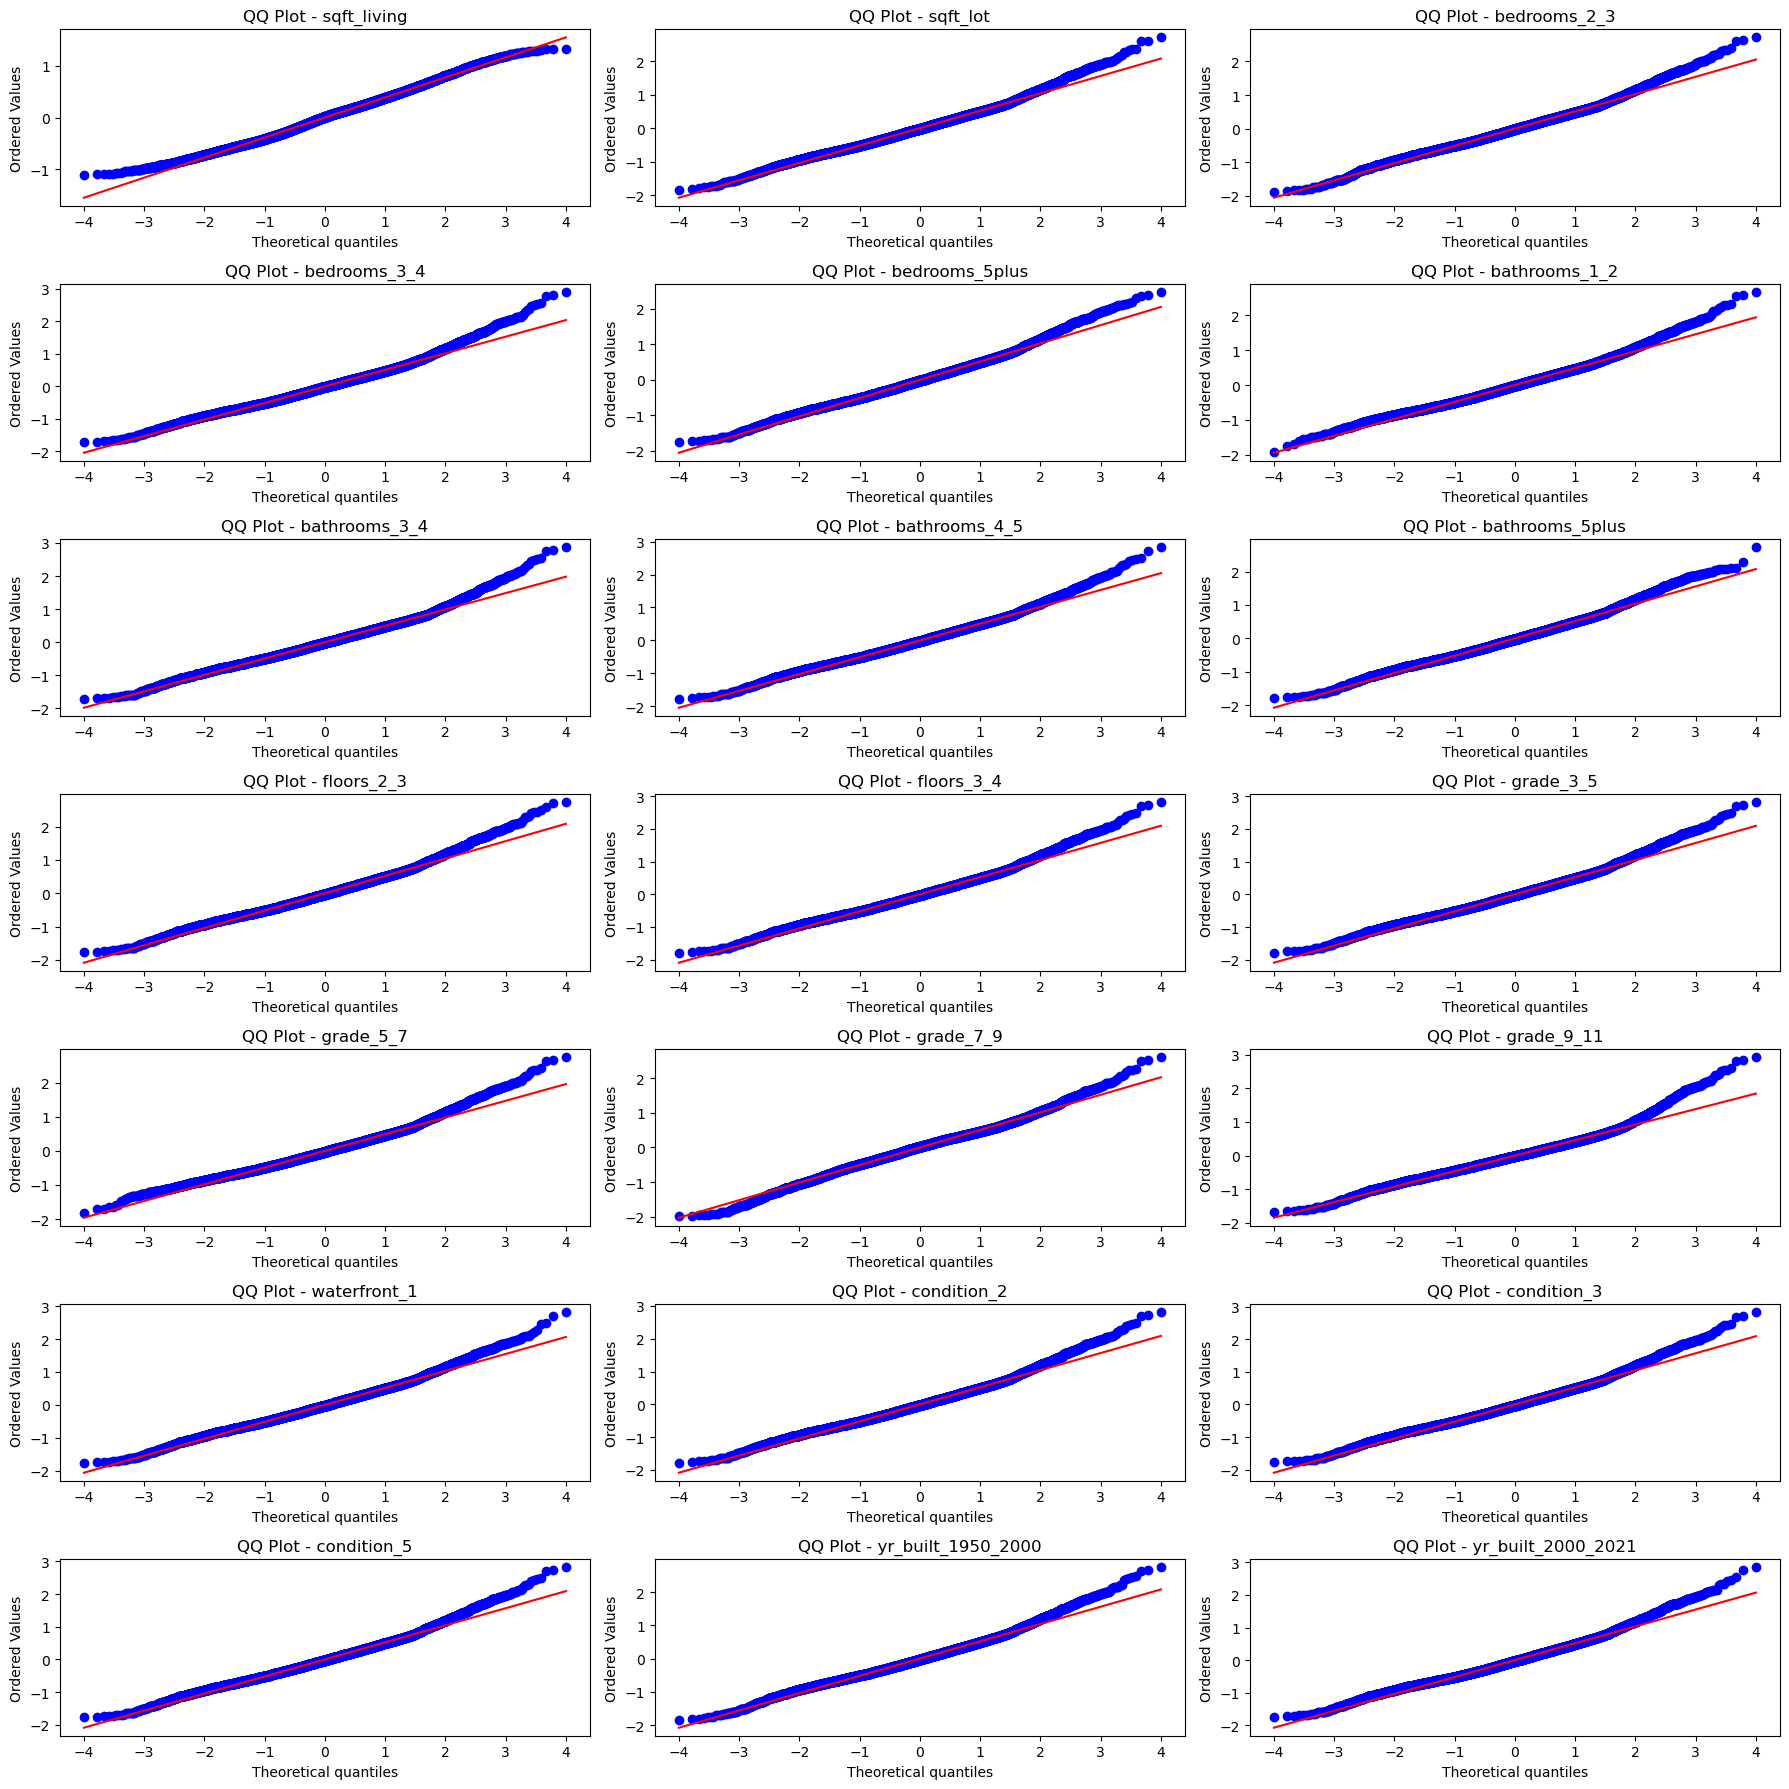

In [59]:
# Create subplots for the QQ plots in a grid layout
fig, axs = plt.subplots(7, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot', 'bedrooms_2_3', 'bedrooms_3_4',
                       'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4', 'bathrooms_4_5',
                       'bathrooms_5plus', 'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7',
                       'grade_7_9', 'grade_9_11', 'waterfront_1', 'condition_2', 'condition_3',
                       'condition_5', 'yr_built_1950_2000', 'yr_built_2000_2021']

# Plot QQ plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Create a fitted model in one line
        model = smf.ols(formula=f'price ~ {predictor_variables[i]}', data=df_it1).fit()
        # Obtain the residuals
        residuals = model.resid
        # Generate QQ plot
        stats.probplot(residuals, plot=ax)
        ax.set_title(f'QQ Plot - {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The Q-Q plot in the current model shows a significant improvement compared to the Q-Q plot from the previous model in Iteration 1. The residuals in the current model exhibit a much closer alignment with the diagonal reference line, indicating a stronger adherence to the assumption of normal distribution. This suggests that the current model provides a better fit to the data in terms of capturing the underlying distribution of the residuals.

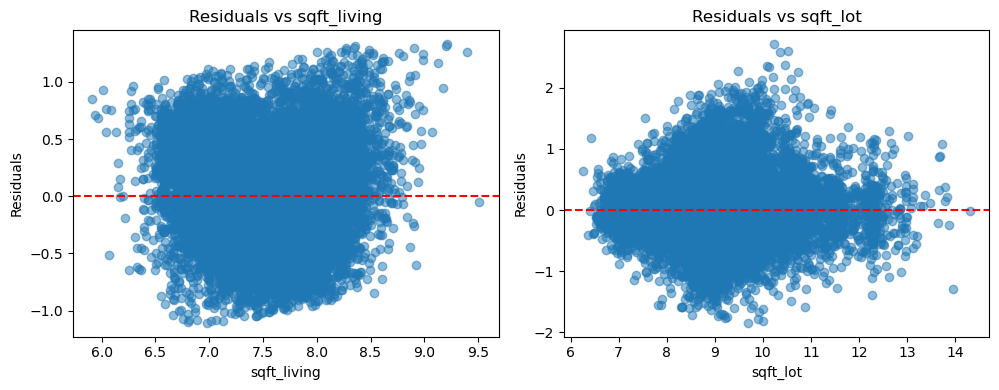

In [60]:
# Create subplots for the scatter plots in a grid layout
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot']

# Plot scatter plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Build the formula
        formula = f'price ~ {predictor_variables[i]}'
        # Create a fitted model
        model = smf.ols(formula=formula, data=df_it1).fit()
        # Obtain the residuals
        residuals = model.resid
        
        # Plot scatter plot
        ax.scatter(df_it1[predictor_variables[i]], residuals, alpha=0.5)
        ax.axhline(y=0, color='red', linestyle='--')
        ax.set_xlabel(predictor_variables[i])
        ax.set_ylabel('Residuals')
        ax.set_title(f'Residuals vs {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The scatter plot of the residuals for the predictor "sqft_living" demonstrates a homoscedastic pattern, as the data points are evenly spread around the line of best fit. This suggests that the variance of the residuals remains relatively constant across different values of "sqft_living."

On the other hand, the scatter plot of the residuals for the predictor "sqft_lot" exhibits a cone-shaped pattern at the lower end of the plot.

In comparison, while the residuals for "sqft_living" adhere to the assumption of homoscedasticity, the residuals for "sqft_lot" do not exhibit a constant spread, indicating the presence of heteroscedasticity.

## Preparation of dataset for Iteration 3

In [61]:
df_it2 = df_it1.copy()

**Determination of the Property Age**

In [62]:
df_it2 = df_it2.drop(['yr_built_1950_2000', 'yr_built_2000_2021'], axis=1)
df_it2 = pd.concat([df_it2, yr_built_df], axis=1)

In [63]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Calculate the property age
df_it2['property_age'] = current_year - df_it2['yr_built']
df_it2.head()

price  sqft_living  sqft_lot  bedrooms_2_3  bedrooms_3_4  \
0  12.309982     7.073270  8.639411             1             0   
1  13.195614     7.851661  8.887653             1             0   
2  12.100712     6.646391  9.210340             0             0   
3  13.311329     7.580700  8.517193             0             1   
4  13.142166     7.426549  8.997147             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  \
0               0              1              0              0   
1               0              0              0              0   
2               0              1              0              0   
3               0              0              1              0   
4               0              0              0              0   

   bathrooms_5plus  ...  grade_3_5  grade_5_7  grade_7_9  grade_9_11  \
0                0  ...          0          0          1           0   
1                0  ...          0          0          1           0   
2                0  ...          0          1          0           0   
3                0  ...          0          0          1           0   
4                0  ...          0          0          1           0   

   waterfront_1  condition_2  condition_3  condition_5  yr_built  property_age  
0             0            0            1            0      1955            68  
1             0            0            1            0      1951            72  
2             0            0            1            0      1933            90  
3             0            0            0            1      1965            58  
4             0            0            1            0      1987            36  

[5 rows x 22 columns]

In [64]:
# Log Transformation of 'yr_built' & 'Property_Age'
df_it2['yr_built'] = np.log(df_it2['yr_built'])
df_it2['property_age'] = np.log(df_it2['property_age'])

In [65]:
df_it2.head()

price  sqft_living  sqft_lot  bedrooms_2_3  bedrooms_3_4  \
0  12.309982     7.073270  8.639411             1             0   
1  13.195614     7.851661  8.887653             1             0   
2  12.100712     6.646391  9.210340             0             0   
3  13.311329     7.580700  8.517193             0             1   
4  13.142166     7.426549  8.997147             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  \
0               0              1              0              0   
1               0              0              0              0   
2               0              1              0              0   
3               0              0              1              0   
4               0              0              0              0   

   bathrooms_5plus  ...  grade_3_5  grade_5_7  grade_7_9  grade_9_11  \
0                0  ...          0          0          1           0   
1                0  ...          0          0          1           0   
2                0  ...          0          1          0           0   
3                0  ...          0          0          1           0   
4                0  ...          0          0          1           0   

   waterfront_1  condition_2  condition_3  condition_5  yr_built  property_age  
0             0            0            1            0  7.578145      4.219508  
1             0            0            1            0  7.576097      4.276666  
2             0            0            1            0  7.566828      4.499810  
3             0            0            0            1  7.583248      4.060443  
4             0            0            1            0  7.594381      3.583519  

[5 rows x 22 columns]

In [66]:
df_std = df_it2[['price','sqft_living','sqft_lot','yr_built','property_age']].copy()

In [67]:
df_std

price  sqft_living  sqft_lot  yr_built  property_age
0      12.309982     7.073270  8.639411  7.578145      4.219508
1      13.195614     7.851661  8.887653  7.576097      4.276666
2      12.100712     6.646391  9.210340  7.566828      4.499810
3      13.311329     7.580700  8.517193  7.583248      4.060443
4      13.142166     7.426549  8.997147  7.594381      3.583519
...          ...          ...       ...       ...           ...
21592  12.793859     7.333023  7.030857  7.605392      2.639057
21593  12.899220     7.745003  8.667852  7.607878      2.197225
21594  12.904459     6.927558  7.207860  7.605392      2.639057
21595  12.899220     7.377759  7.778211  7.602900      2.944439
21596  12.691580     6.927558  6.981006  7.604894      2.708050

[21597 rows x 5 columns]

**Standardize the continuous variables**

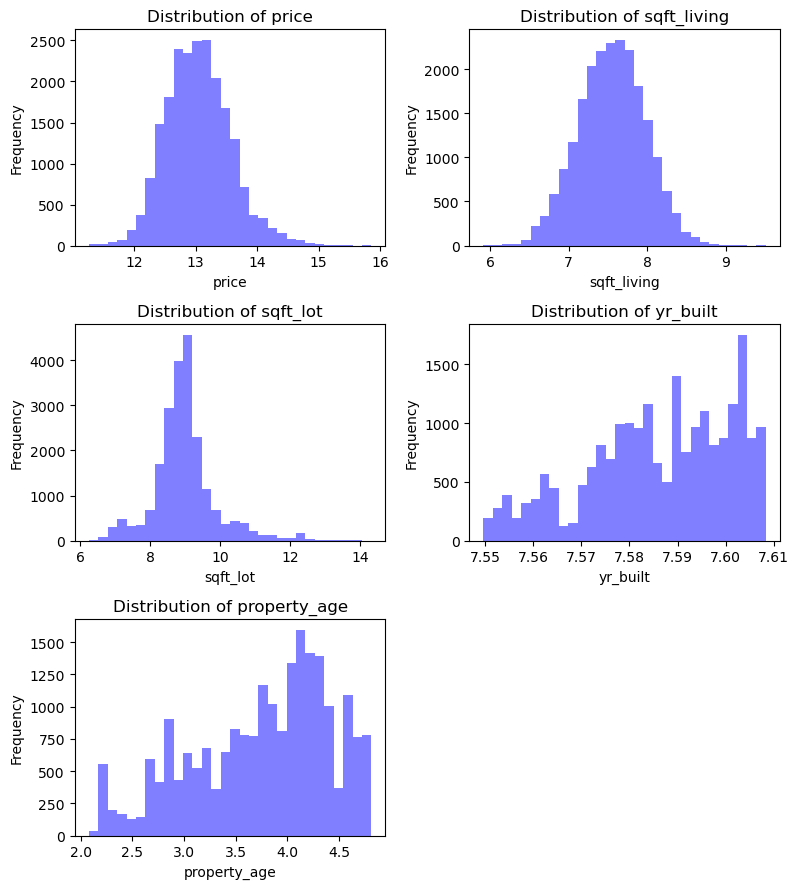

In [68]:
# Define the variables to plot
variables = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'property_age']

# Calculate the number of rows and columns for the grid
num_rows = len(variables) // 2 + len(variables) % 2
num_cols = 2

# Set the figure size and grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 3*num_rows))

# Flatten the subplot array for easier indexing
axs = axs.flatten()

# Plot histograms for each variable in the grid
for i, var in enumerate(variables):
    axs[i].hist(df_std[var], bins=30, color='blue', alpha=0.5)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {var}')

# Remove any empty subplots
if len(variables) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object for Min-Max scaling
min_max_scaler = MinMaxScaler()

# Create a StandardScaler object for standardization
standard_scaler = StandardScaler()

# Perform Min-Max scaling on 'price', 'sqft_lot' and 'sqft_living'
df_scaled = df_std.copy()  # Create a copy of the DataFrame
df_scaled[['price', 'sqft_living','sqft_lot']] = min_max_scaler.fit_transform(df_scaled[['price', 'sqft_living','sqft_lot']])

# Perform standardization on 'yr_built', and 'property_age'
df_scaled[['yr_built', 'property_age']] = standard_scaler.fit_transform(df_scaled[['yr_built', 'property_age']])

# Display the scaled DataFrame
df_scaled


price  sqft_living  sqft_lot  yr_built  property_age
0      0.227669     0.322166  0.295858 -0.537421      0.690985
1      0.420522     0.538392  0.326644 -0.674341      0.776422
2      0.182099     0.203585  0.366664 -1.293975      1.109965
3      0.445720     0.463123  0.280700 -0.196343      0.453223
4      0.408883     0.420302  0.340224  0.547959     -0.259658
...         ...          ...       ...       ...           ...
21592  0.333037     0.394322  0.096366  1.284066     -1.671390
21593  0.355980     0.508764  0.299385  1.450238     -2.331818
21594  0.357121     0.281690  0.118318  1.284066     -1.671390
21595  0.355980     0.406749  0.189052  1.117479     -1.214921
21596  0.310765     0.281690  0.090184  1.250781     -1.568263

[21597 rows x 5 columns]

In [70]:
df_scaled.describe().round(2)

price  sqft_living  sqft_lot  yr_built  property_age
count  21597.00     21597.00  21597.00  21597.00      21597.00
mean       0.39         0.45      0.34     -0.00          0.00
std        0.11         0.12      0.11      1.00          1.00
min        0.00         0.00      0.00     -2.45         -2.51
25%        0.31         0.38      0.28     -0.67         -0.75
50%        0.38         0.46      0.33      0.14          0.17
75%        0.46         0.54      0.37      0.88          0.78
max        1.00         1.00      1.00      1.48          1.58

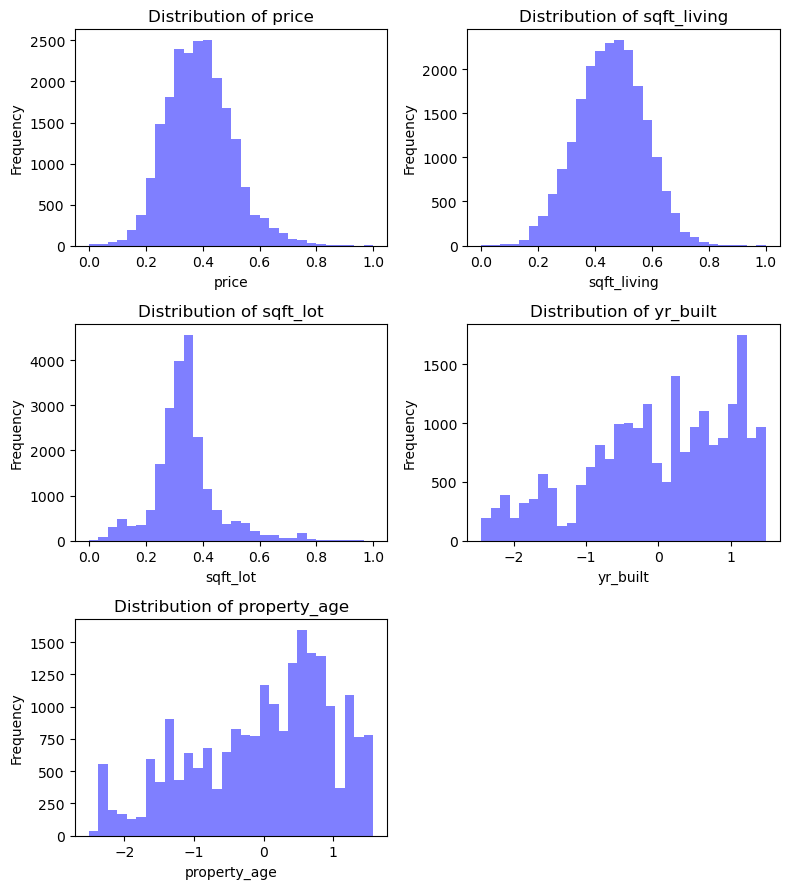

In [71]:
variables = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'property_age']

# Calculate the number of rows and columns for the grid
num_rows = len(variables) // 2 + len(variables) % 2
num_cols = 2

# Set the figure size and grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 3*num_rows))

# Flatten the subplot array for easier indexing
axs = axs.flatten()

# Plot histograms for each variable in the grid
for i, var in enumerate(variables):
    axs[i].hist(df_scaled[var], bins=30, color='blue', alpha=0.5)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {var}')

# Remove any empty subplots
if len(variables) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

In [72]:
df_it2 = df_it2.drop(['price','sqft_living','sqft_lot','yr_built','property_age'], axis=1)
df_it2 = pd.concat([df_scaled,df_it2], axis=1)
df_it2

price  sqft_living  sqft_lot  yr_built  property_age  bedrooms_2_3  \
0      0.227669     0.322166  0.295858 -0.537421      0.690985             1   
1      0.420522     0.538392  0.326644 -0.674341      0.776422             1   
2      0.182099     0.203585  0.366664 -1.293975      1.109965             0   
3      0.445720     0.463123  0.280700 -0.196343      0.453223             0   
4      0.408883     0.420302  0.340224  0.547959     -0.259658             1   
...         ...          ...       ...       ...           ...           ...   
21592  0.333037     0.394322  0.096366  1.284066     -1.671390             1   
21593  0.355980     0.508764  0.299385  1.450238     -2.331818             0   
21594  0.357121     0.281690  0.118318  1.284066     -1.671390             0   
21595  0.355980     0.406749  0.189052  1.117479     -1.214921             1   
21596  0.310765     0.281690  0.090184  1.250781     -1.568263             0   

       bedrooms_3_4  bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  ...  \
0                 0               0              1              0  ...   
1                 0               0              0              0  ...   
2                 0               0              1              0  ...   
3                 1               0              0              1  ...   
4                 0               0              0              0  ...   
...             ...             ...            ...            ...  ...   
21592             0               0              0              0  ...   
21593             1               0              0              0  ...   
21594             0               0              0              0  ...   
21595             0               0              0              0  ...   
21596             0               0              0              0  ...   

       floors_2_3  floors_3_4  grade_3_5  grade_5_7  grade_7_9  grade_9_11  \
0               0           0          0          0          1           0   
1               0           0          0          0          1           0   
2               0           0          0          1          0           0   
3               0           0          0          0          1           0   
4               0           0          0          0          1           0   
...           ...         ...        ...        ...        ...         ...   
21592           1           0          0          0          1           0   
21593           0           0          0          0          1           0   
21594           0           0          0          0          1           0   
21595           0           0          0          0          1           0   
21596           0           0          0          0          1           0   

       waterfront_1  condition_2  condition_3  condition_5  
0                 0            0            1            0  
1                 0            0            1            0  
2                 0            0            1            0  
3                 0            0            0            1  
4                 0            0            1            0  
...             ...          ...          ...          ...  
21592             0            0            1            0  
21593             0            0            1            0  
21594             0            0            1            0  
21595             0            0            1            0  
21596             0            0            1            0  

[21597 rows x 22 columns]

In [73]:
df_it2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'yr_built', 'property_age',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5'],
      dtype='object')

In [74]:
# create single dataframe called df_preprocessed
numeric_vars1 = ['sqft_living', 'sqft_lot', 'yr_built', 'property_age',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5']
df_preprocessed1 = df_it2.loc[:, numeric_vars1]

df_preprocessed1.corr()

sqft_living  sqft_lot  yr_built  property_age  bedrooms_2_3  \
sqft_living         1.000000  0.325983  0.348973     -0.342090     -0.226209   
sqft_lot            0.325983  1.000000 -0.004421      0.135134     -0.041673   
yr_built            0.348973 -0.004421  1.000000     -0.945052      0.026147   
property_age       -0.342090  0.135134 -0.945052      1.000000      0.014570   
bedrooms_2_3       -0.226209 -0.041673  0.026147      0.014570      1.000000   
bedrooms_3_4        0.397927  0.125601  0.129991     -0.128241     -0.624709   
bedrooms_5plus      0.320636  0.080744  0.011512     -0.022288     -0.286568   
bathrooms_1_2      -0.589427 -0.037272 -0.482984      0.493550      0.130483   
bathrooms_3_4       0.365902  0.037492  0.173977     -0.210174     -0.144433   
bathrooms_4_5       0.237582  0.079640  0.064066     -0.078165     -0.098701   
bathrooms_5plus     0.140535  0.070552  0.041839     -0.044569     -0.049801   
floors_2_3         -0.012327 -0.275353  0.160828     -0.219919      0.055010   
floors_3_4          0.001058 -0.030316  0.011918     -0.016633      0.004214   
grade_3_5          -0.091802  0.010229 -0.043365      0.037516     -0.030329   
grade_5_7          -0.436561 -0.008154 -0.342429      0.308515     -0.036651   
grade_7_9          -0.201261 -0.180595 -0.030740      0.073210      0.176348   
grade_9_11          0.482322  0.160186  0.276063     -0.300714     -0.141737   
waterfront_1        0.078900  0.072340 -0.024359      0.027137     -0.014085   
condition_2        -0.080514  0.039071 -0.066881      0.065621     -0.008764   
condition_3         0.098525 -0.120024  0.389669     -0.433234     -0.013520   
condition_5        -0.016130 -0.002852 -0.244260      0.231859     -0.015792   

                 bedrooms_3_4  bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  \
sqft_living          0.397927        0.320636      -0.589427       0.365902   
sqft_lot             0.125601        0.080744      -0.037272       0.037492   
yr_built             0.129991        0.011512      -0.482984       0.173977   
property_age        -0.128241       -0.022288       0.493550      -0.210174   
bedrooms_2_3        -0.624709       -0.286568       0.130483      -0.144433   
bedrooms_3_4         1.000000       -0.214538      -0.278261       0.112069   
bedrooms_5plus      -0.214538        1.000000      -0.163583       0.219799   
bathrooms_1_2       -0.278261       -0.163583       1.000000      -0.269349   
bathrooms_3_4        0.112069        0.219799      -0.269349       1.000000   
bathrooms_4_5        0.021852        0.196866      -0.100138      -0.042765   
bathrooms_5plus     -0.004377        0.120097      -0.043296      -0.018490   
floors_2_3          -0.067977       -0.008006      -0.099136       0.076548   
floors_3_4          -0.012314        0.003358      -0.014300       0.010807   
grade_3_5           -0.024640       -0.011303       0.008377      -0.012220   
grade_5_7           -0.152810       -0.077704       0.341325      -0.111071   
grade_7_9           -0.091035       -0.056916       0.081343      -0.201097   
grade_9_11           0.202377        0.092930      -0.328835       0.262546   
waterfront_1        -0.011549        0.019625      -0.028390       0.031467   
condition_2         -0.020433       -0.020605       0.060517      -0.026765   
condition_3          0.023415       -0.008878      -0.185172       0.103560   
condition_5          0.014007        0.017212       0.031099      -0.009878   

                 bathrooms_4_5  ...  floors_2_3  floors_3_4  grade_3_5  \
sqft_living           0.237582  ...   -0.012327    0.001058  -0.091802   
sqft_lot              0.079640  ...   -0.275353   -0.030316   0.010229   
yr_built              0.064066  ...    0.160828    0.011918  -0.043365   
property_age         -0.078165  ...   -0.219919   -0.016633   0.037516   
bedrooms_2_3         -0.098701  ...    0.055010    0.004214  -0.030329   
bedrooms_3_4          0.021852  ...   -0.067977   -0.012314  -0.024640   

In [75]:
df2=df_preprocessed1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [76]:
df2[(df2.cc>.75) & (df2.cc <1)]

cc
pairs                             
(yr_built, property_age)  0.945052

In [77]:
# Dropping the one of the variables from each pairs which is having the correlation greater than 0.75 and less than 1
df_preprocessed1.drop(columns=['yr_built'], inplace=True)
df_preprocessed1.head()

sqft_living  sqft_lot  property_age  bedrooms_2_3  bedrooms_3_4  \
0     0.322166  0.295858      0.690985             1             0   
1     0.538392  0.326644      0.776422             1             0   
2     0.203585  0.366664      1.109965             0             0   
3     0.463123  0.280700      0.453223             0             1   
4     0.420302  0.340224     -0.259658             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  \
0               0              1              0              0   
1               0              0              0              0   
2               0              1              0              0   
3               0              0              1              0   
4               0              0              0              0   

   bathrooms_5plus  floors_2_3  floors_3_4  grade_3_5  grade_5_7  grade_7_9  \
0                0           0           0          0          0          1   
1                0           0           0          0          0          1   
2                0           0           0          0          1          0   
3                0           0           0          0          0          1   
4                0           0           0          0          0          1   

   grade_9_11  waterfront_1  condition_2  condition_3  condition_5  
0           0             0            0            1            0  
1           0             0            0            1            0  
2           0             0            0            1            0  
3           0             0            0            0            1  
4           0             0            0            1            0

In [78]:
df_it2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'yr_built', 'property_age',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5'],
      dtype='object')

In [79]:
df_it2 = df_it2.drop(['sqft_living', 'sqft_lot', 'yr_built', 'property_age',
       'bedrooms_2_3', 'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2',
       'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5'],axis=1)

In [80]:
df_it2 = pd.concat([df_it2, df_preprocessed1], axis=1)
df_it2.head()

price  sqft_living  sqft_lot  property_age  bedrooms_2_3  bedrooms_3_4  \
0  0.227669     0.322166  0.295858      0.690985             1             0   
1  0.420522     0.538392  0.326644      0.776422             1             0   
2  0.182099     0.203585  0.366664      1.109965             0             0   
3  0.445720     0.463123  0.280700      0.453223             0             1   
4  0.408883     0.420302  0.340224     -0.259658             1             0   

   bedrooms_5plus  bathrooms_1_2  bathrooms_3_4  bathrooms_4_5  ...  \
0               0              1              0              0  ...   
1               0              0              0              0  ...   
2               0              1              0              0  ...   
3               0              0              1              0  ...   
4               0              0              0              0  ...   

   floors_2_3  floors_3_4  grade_3_5  grade_5_7  grade_7_9  grade_9_11  \
0           0           0          0          0          1           0   
1           0           0          0          0          1           0   
2           0           0          0          1          0           0   
3           0           0          0          0          1           0   
4           0           0          0          0          1           0   

   waterfront_1  condition_2  condition_3  condition_5  
0             0            0            1            0  
1             0            0            1            0  
2             0            0            1            0  
3             0            0            0            1  
4             0            0            1            0  

[5 rows x 21 columns]

## Iteration 3: Model (OLS Statsmodel) + Transformation 2

In [81]:
# Fit the OLS model
X = df_it2[['sqft_living', 'sqft_lot', 'property_age', 'bedrooms_2_3',
       'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4',
       'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3', 'floors_3_4',
       'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11', 'waterfront_1',
       'condition_2', 'condition_3', 'condition_5']]
y = df_it2['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_it3 = model.fit()
print(results_it3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:23:58   Log-Likelihood:                 26142.
No. Observations:               21597   AIC:                        -5.224e+04
Df Residuals:                   21576   BIC:                        -5.207e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3587      0.006     

R-squared: The R-squared value for the model is 0.604, which indicates that the model explains approximately 60.4% of the variance in the dependent variable, 'price'. This is the same as the Adjusted R-squared value, suggesting that the additional predictors in this iteration did not significantly improve the model's fit.

The coefficients for the predictors provide insights into their individual impacts on the 'price'. Notably, 'sqft_living', 'sqft_lot', and 'property_age' have positive coefficients, indicating a positive relationship with the 'price'. Other predictors such as 'bedrooms', 'bathrooms', 'floors', 'grade', 'waterfront', and 'condition' have negative coefficients, suggesting a negative association with the 'price'.

Most of the predictors in the model have p-values less than 0.05, indicating that they are statistically significant in explaining the 'price' variation. However, the predictor 'floors_3_4' has a p-value of 0.074, which is slightly above the significance threshold. This suggests that the relationship between 'floors_3_4' and 'price' may not be statistically significant.

The F-statistic is 1648 with a corresponding p-value close to 0, indicating that the overall model is statistically significant in explaining the 'price' variation. The log-likelihood is 26142, and the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values are negative, suggesting a good fit of the model.

Overall, it can be observed that the regression models in Iteration 2 and Iteration 3 show improvements in terms of reduced departure from normality, decreased skewness, and kurtosis compared to Iteration 1. However, none of the iterations fully satisfy the normality assumption, and there is still room for further refinement. The Durbin-Watson statistic remained consistent across all iterations, indicating no significant autocorrelation in the residuals.

**Assumptions of Linear Regression**

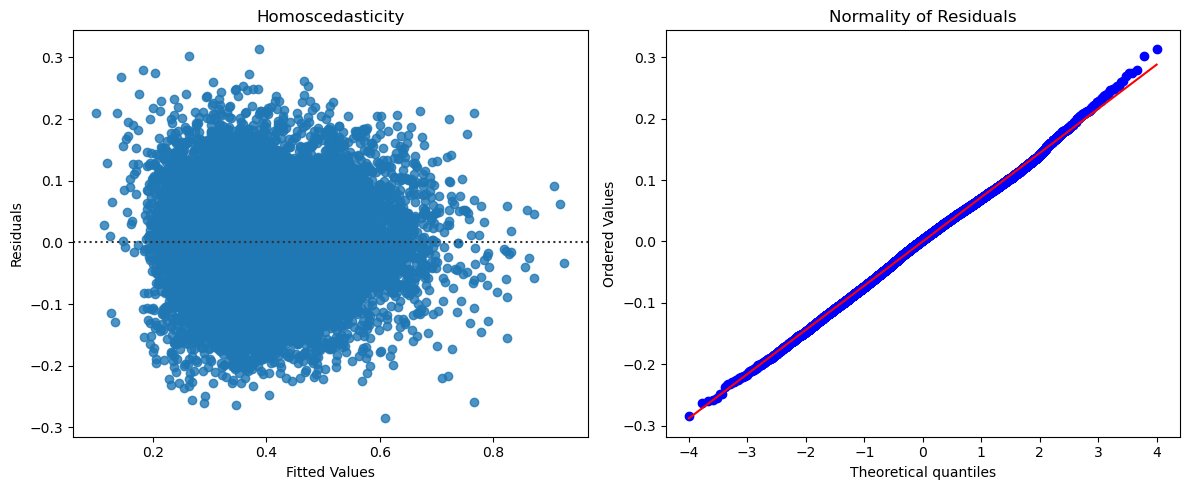

In [82]:
pred_val3 = results_it3.fittedvalues
resid3 = results_it3.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for homoscedasticity
sns.residplot(x=pred_val3, y=resid3, line_kws={'color': 'black'}, ax=ax1)
ax1.set_title('Homoscedasticity')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Q-Q plot for normality
stats.probplot(resid3, dist='norm', plot=ax2)
ax2.set_title('Normality of Residuals')

plt.tight_layout()
plt.show()

**Assessment of Residuals: Histogram and QQ Plot for Continuous Variables in Linear Regression Assumptions**

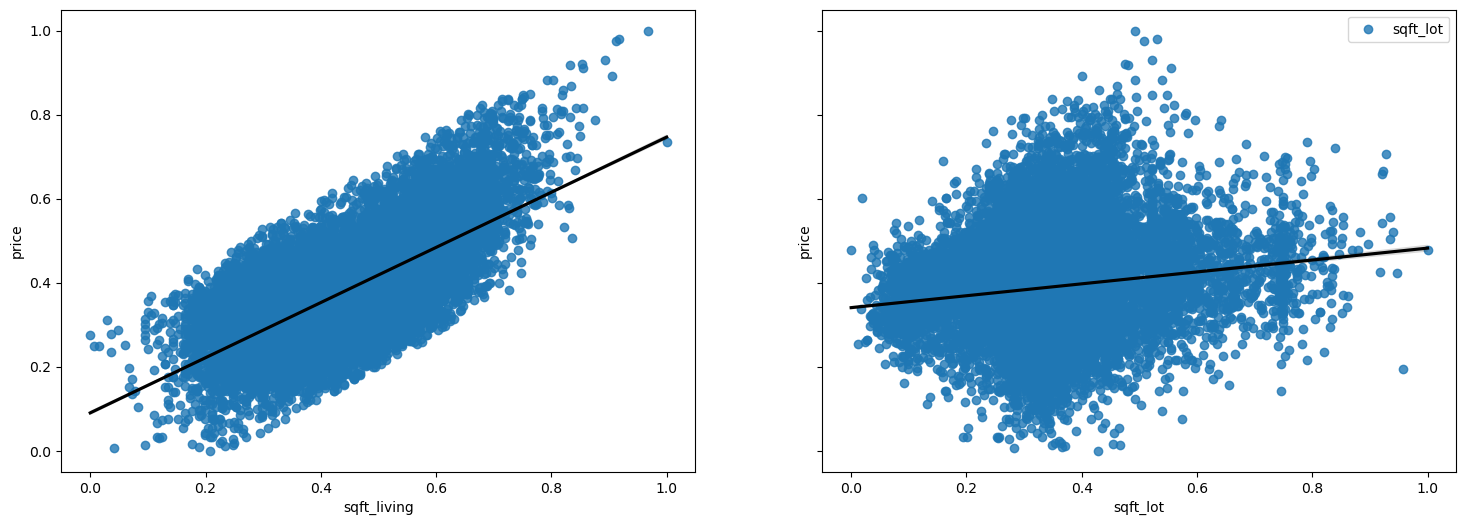

In [83]:
# Visualize the relationship between the predictors and the target using scatter plots
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'sqft_lot']):
    sns.regplot(x=channel, y='price', data=df_it2, ax=axs[idx], label=channel,
                line_kws={'color': 'black'})
plt.legend()
plt.show()

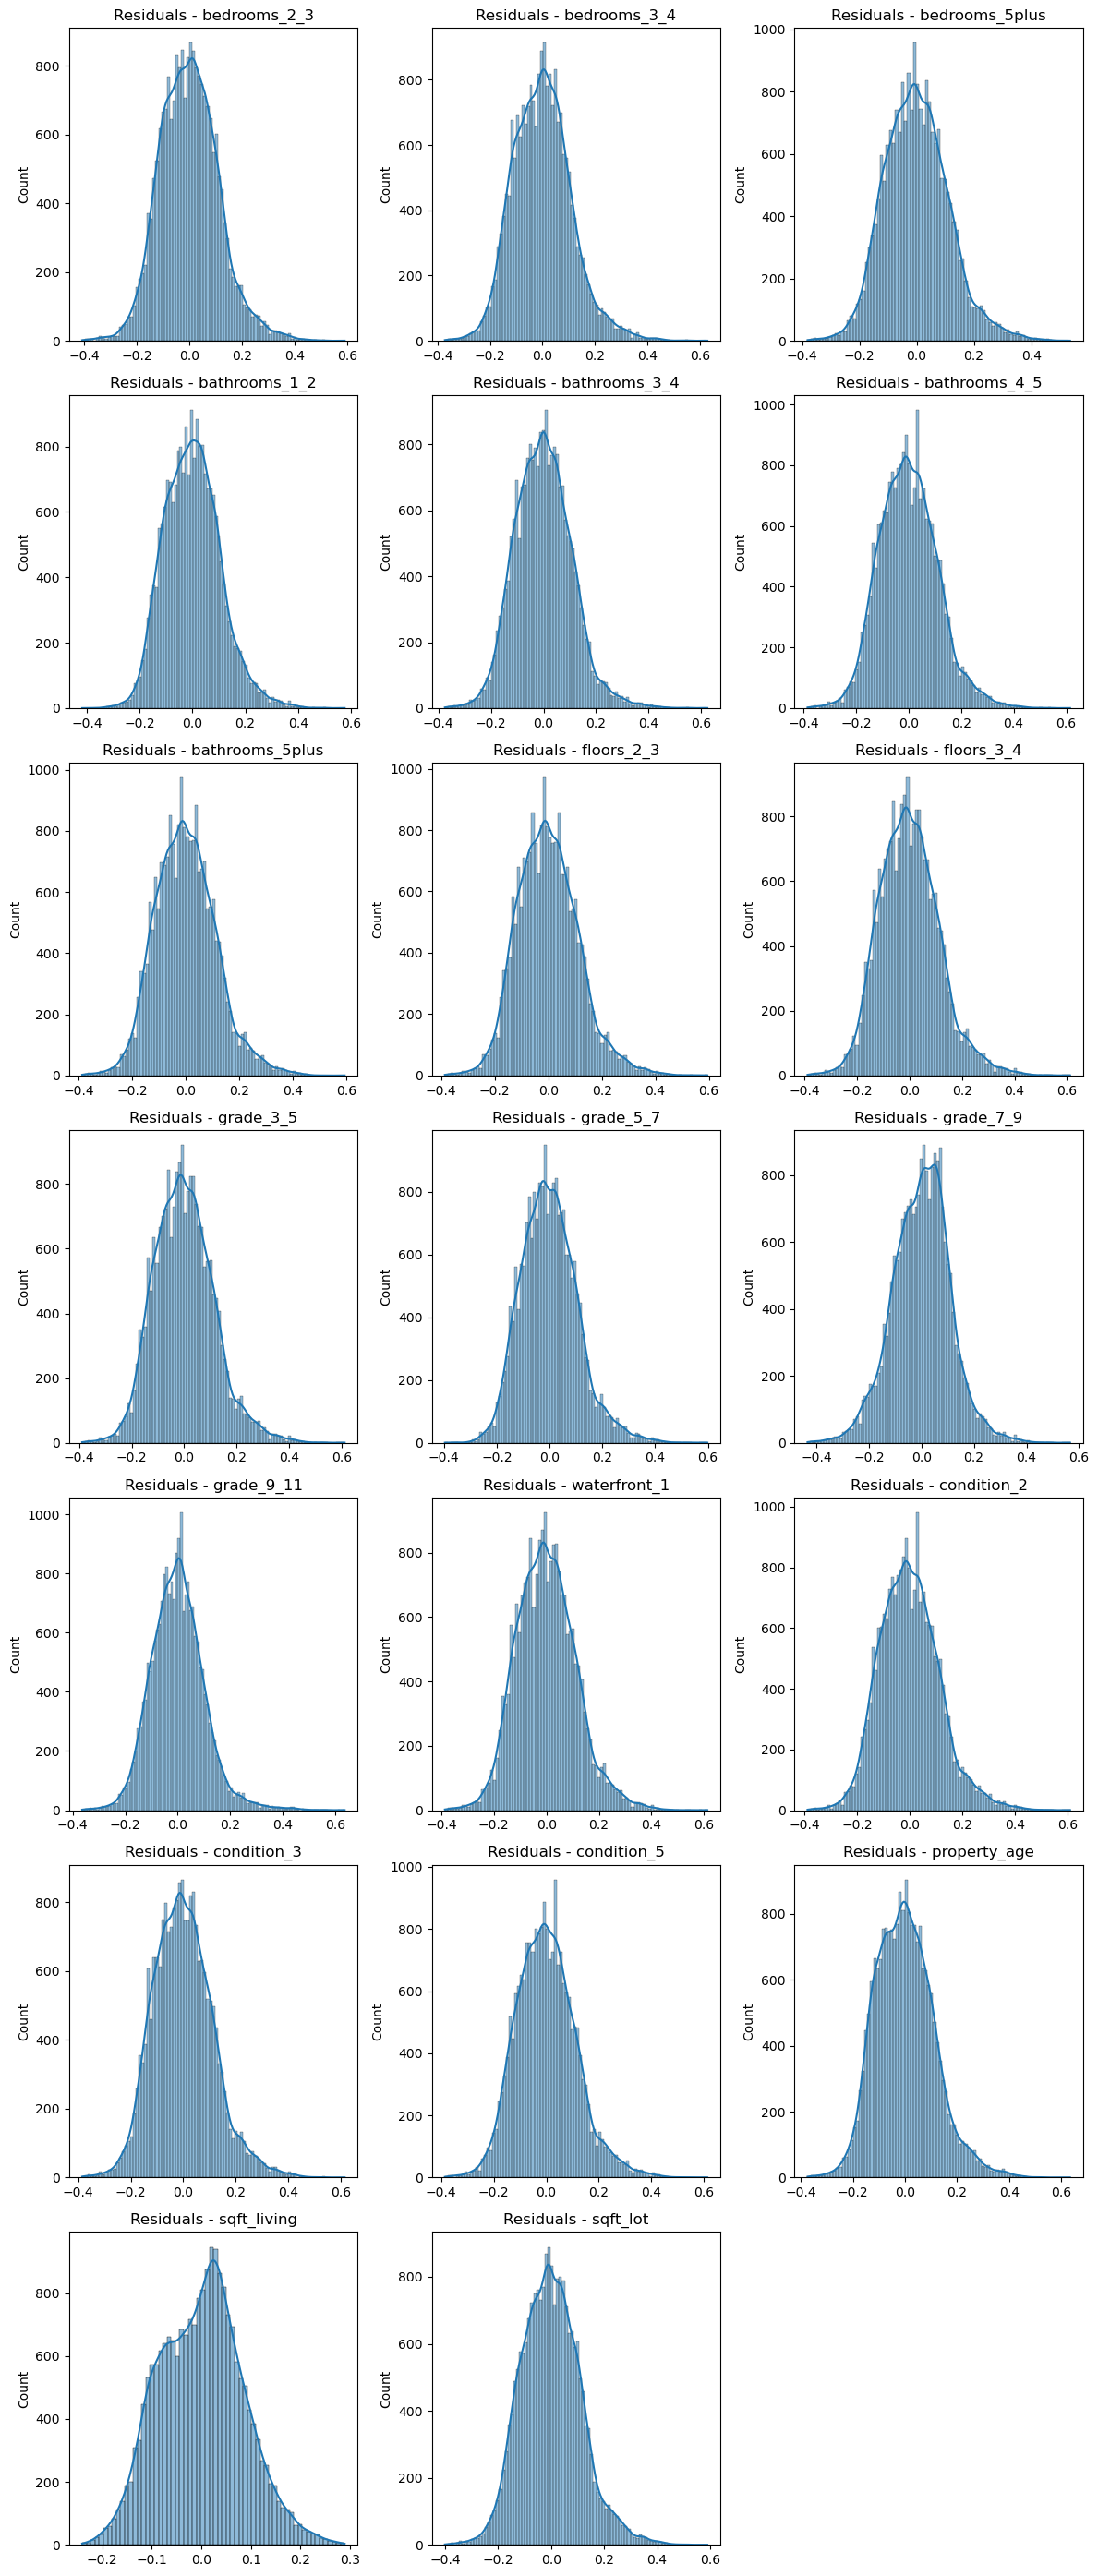

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Build the formulas
formulas = ['price ~ bedrooms_2_3', 'price ~ bedrooms_3_4', 'price ~ bedrooms_5plus',
            'price ~ bathrooms_1_2', 'price ~ bathrooms_3_4', 'price ~ bathrooms_4_5', 'price ~ bathrooms_5plus',
            'price ~ floors_2_3', 'price ~ floors_3_4',
            'price ~ grade_3_5', 'price ~ grade_5_7', 'price ~ grade_7_9', 'price ~ grade_9_11',
            'price ~ waterfront_1', 'price ~ condition_2', 'price ~ condition_3', 'price ~ condition_5',
            'price ~ property_age','price ~ sqft_living', 'price ~ sqft_lot']

# Create fitted models in one line
models = [smf.ols(formula=formula, data=df_it2).fit() for formula in formulas]

# Obtain the residuals for each model
residuals = [model.resid for model in models]

# Determine the number of rows and columns for the grid
num_plots = len(formulas)
num_rows = (num_plots + 2) // 3  # Add 2 to ensure enough space for the last row
num_cols = min(num_plots, 3)

# Create subplots for the histograms in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot histograms of residuals with KDE curve
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        sns.histplot(residuals[i], kde=True, ax=ax)
        ax.set_title('Residuals - ' + formulas[i].split('~')[1].strip())
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

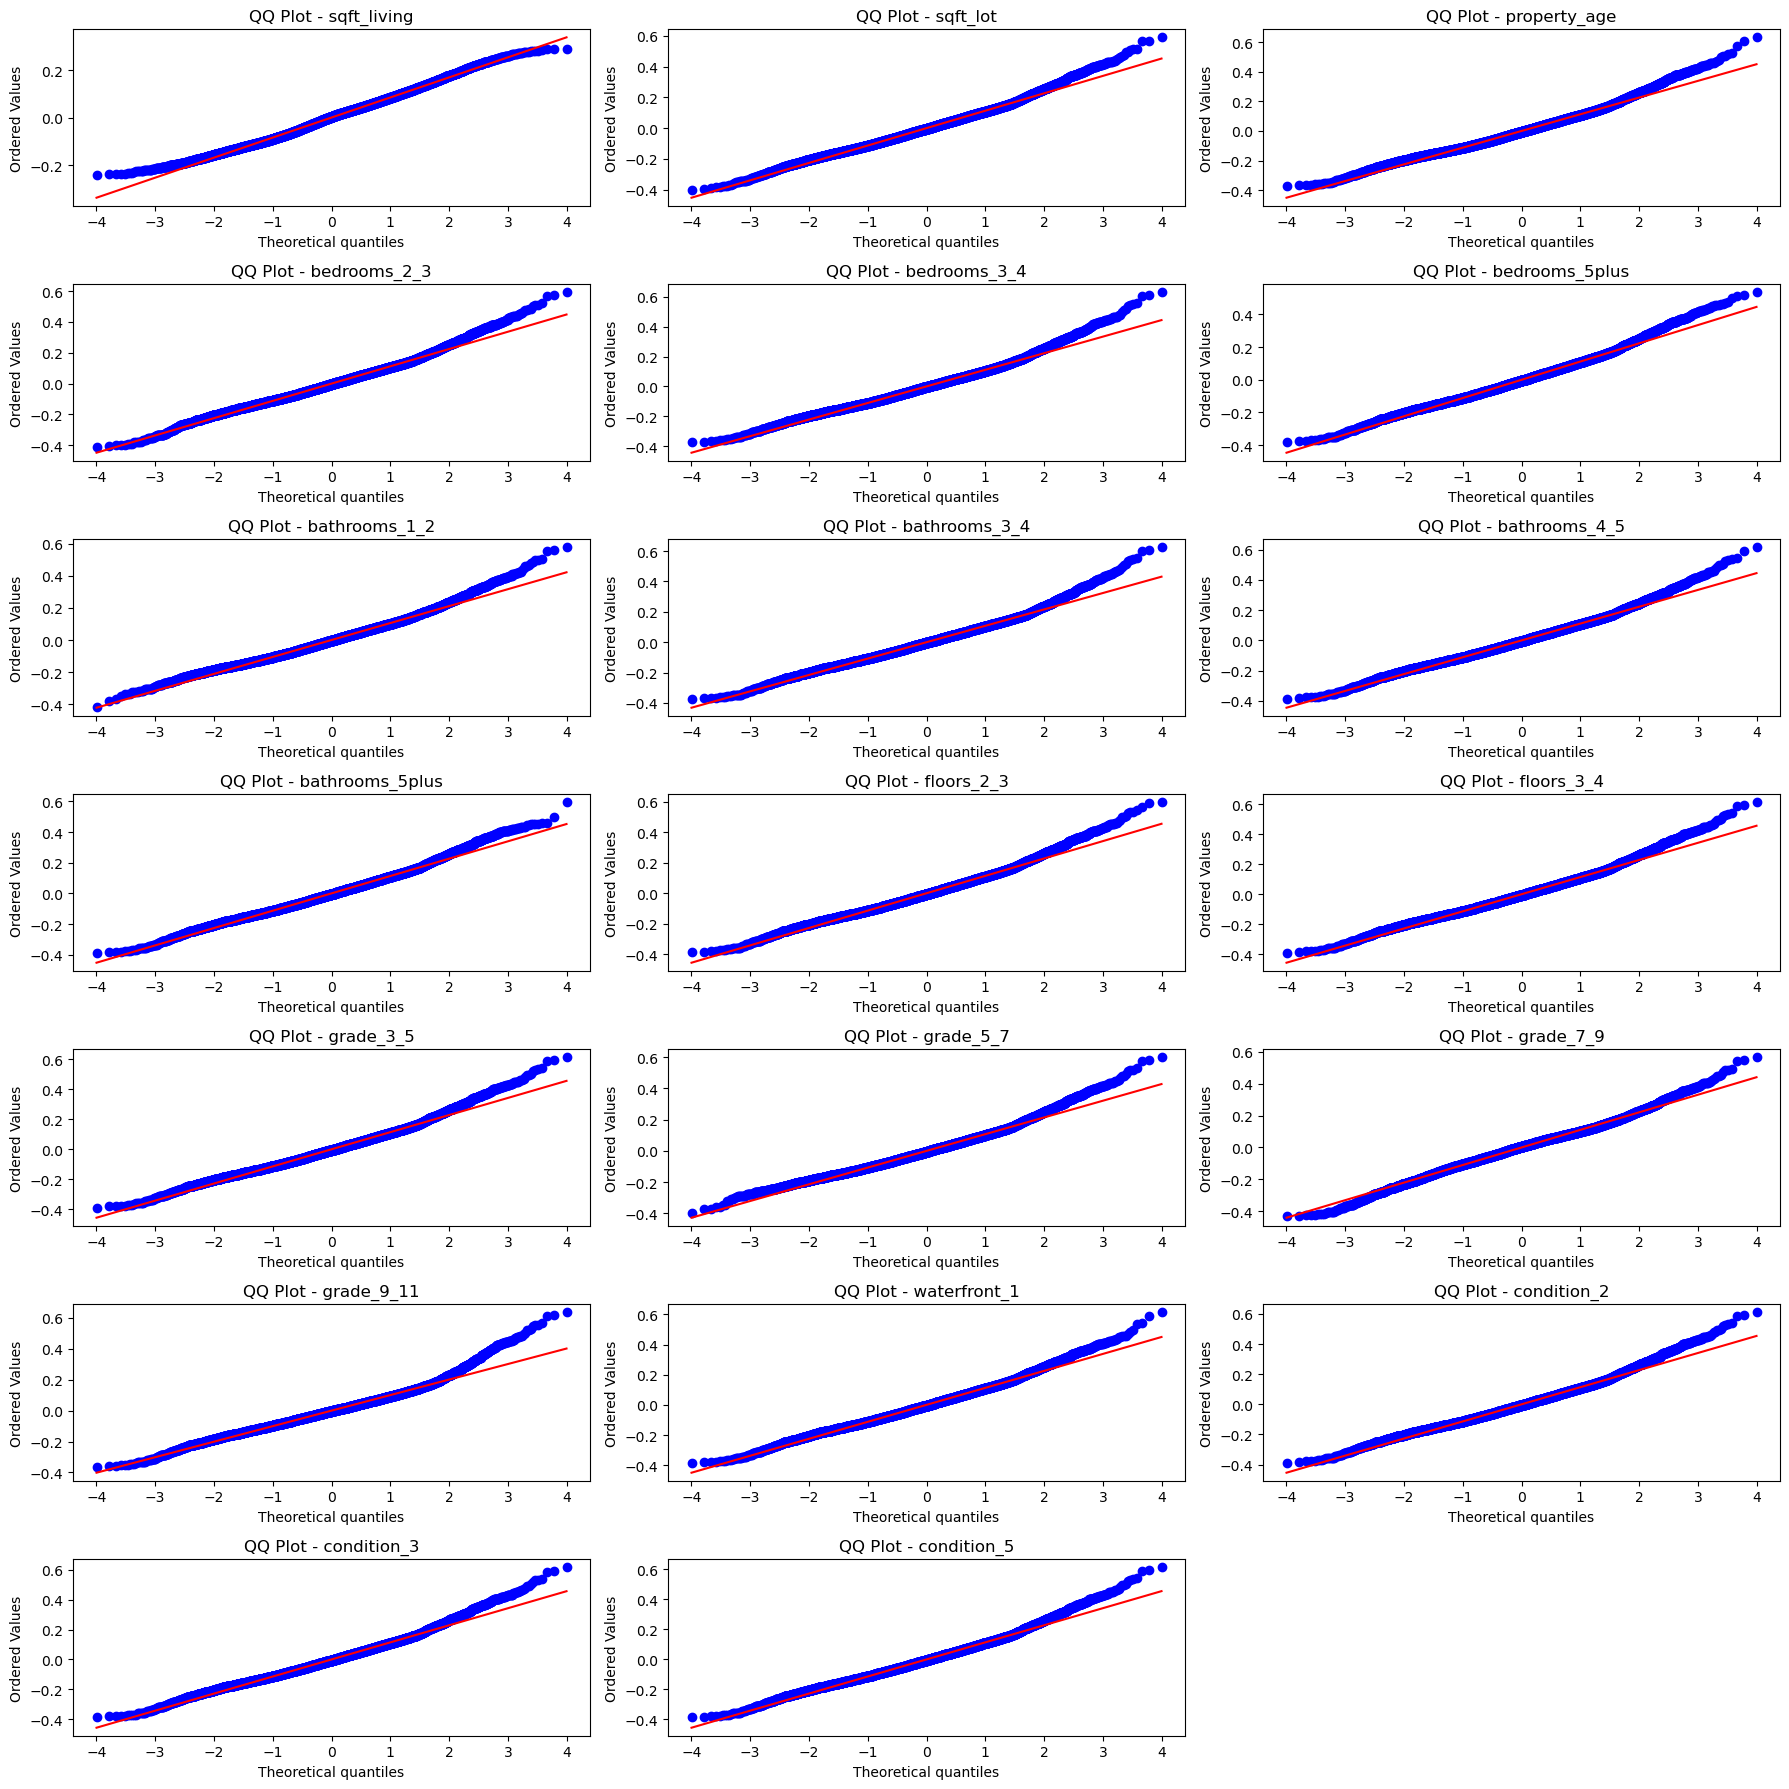

In [85]:
# Create subplots for the QQ plots in a grid layout
fig, axs = plt.subplots(7, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot', 'property_age', 'bedrooms_2_3',
                       'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4',
                       'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3', 'floors_3_4',
                       'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11', 'waterfront_1',
                       'condition_2', 'condition_3', 'condition_5']

# Plot QQ plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Create a fitted model in one line
        model = smf.ols(formula=f'price ~ {predictor_variables[i]}', data=df_it2).fit()
        # Obtain the residuals
        residuals = model.resid
        # Generate QQ plot
        stats.probplot(residuals, plot=ax)
        ax.set_title(f'QQ Plot - {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

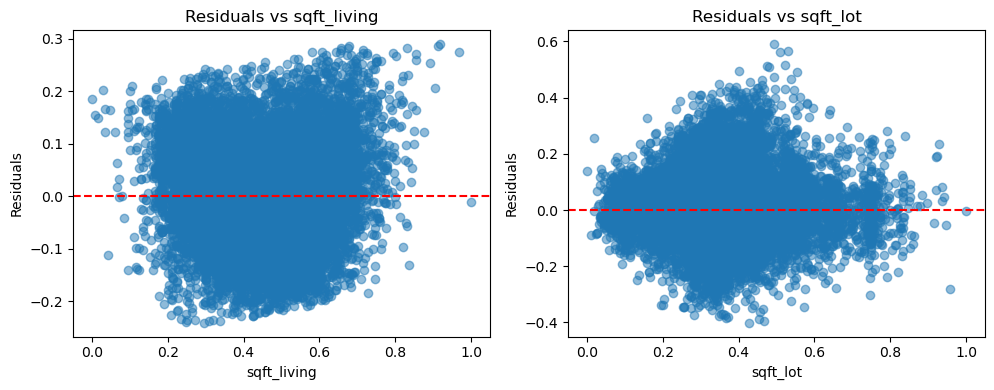

In [86]:
# Create subplots for the scatter plots in a grid layout
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot']

# Plot scatter plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Build the formula
        formula = f'price ~ {predictor_variables[i]}'
        # Create a fitted model
        model = smf.ols(formula=formula, data=df_it2).fit()
        # Obtain the residuals
        residuals = model.resid
        
        # Plot scatter plot
        ax.scatter(df_it2[predictor_variables[i]], residuals, alpha=0.5)
        ax.axhline(y=0, color='red', linestyle='--')
        ax.set_xlabel(predictor_variables[i])
        ax.set_ylabel('Residuals')
        ax.set_title(f'Residuals vs {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

## Preparation of dataset for Iteration 4

In [87]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

In [88]:
df_it1.columns

Index(['price', 'sqft_living', 'sqft_lot', 'bedrooms_2_3', 'bedrooms_3_4',
       'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4', 'bathrooms_4_5',
       'bathrooms_5plus', 'floors_2_3', 'floors_3_4', 'grade_3_5', 'grade_5_7',
       'grade_7_9', 'grade_9_11', 'waterfront_1', 'condition_2', 'condition_3',
       'condition_5', 'yr_built_1950_2000', 'yr_built_2000_2021'],
      dtype='object')

In [89]:
df_it2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'property_age', 'bedrooms_2_3',
       'bedrooms_3_4', 'bedrooms_5plus', 'bathrooms_1_2', 'bathrooms_3_4',
       'bathrooms_4_5', 'bathrooms_5plus', 'floors_2_3', 'floors_3_4',
       'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11', 'waterfront_1',
       'condition_2', 'condition_3', 'condition_5'],
      dtype='object')

In [90]:
# Create a new column 'bedrooms_group' based on 'bedrooms'
df['bedrooms_group'] = df['bedrooms'].apply(lambda x: '1_2' if x >= 1 and x < 3 
                                                    else ('2_3' if x >= 2 and x < 4 
                                                          else ('3_4' if x >= 3 and x < 5 
                                                                else '5plus')))

# Create dummy variables for 'bedrooms_group'
dummy_df1_bedrooms = pd.get_dummies(df['bedrooms_group'], prefix='bedrooms', drop_first=False)
dummy_df1_bedrooms = dummy_df1_bedrooms.drop('bedrooms_5plus', axis=1)

# Create a new column 'bathrooms_group' based on 'bathrooms'
df['bathrooms_group'] = df['bathrooms'].apply(lambda x: '0.5_1' if x >= 0.5 and x < 1 
                                                      else ('1_2' if x >= 1 and x < 2 
                                                            else ('2_3' if x >= 2 and x < 3 
                                                                  else ('3_4' if x >= 3 and x < 4 
                                                                        else ('4_5' if x >= 4 and x < 5 
                                                                              else '5plus')))))

# Create dummy variables for 'bathrooms_group'
dummy_df1_bathrooms = pd.get_dummies(df['bathrooms_group'], prefix='bathrooms', drop_first=True)

In [91]:
df_it3  = df_it2.drop(['bedrooms_2_3','bedrooms_3_4', 'bedrooms_5plus',
                       'bathrooms_1_2', 'bathrooms_3_4','bathrooms_4_5', 'bathrooms_5plus'], axis=1)

In [92]:
df_it3.columns

Index(['price', 'sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5'],
      dtype='object')

In [93]:
df_it3 = pd.concat([df_it3,dummy_df1_bedrooms,dummy_df1_bathrooms], axis=1)
df_it3.head()

price  sqft_living  sqft_lot  property_age  floors_2_3  floors_3_4  \
0  0.227669     0.322166  0.295858      0.690985           0           0   
1  0.420522     0.538392  0.326644      0.776422           0           0   
2  0.182099     0.203585  0.366664      1.109965           0           0   
3  0.445720     0.463123  0.280700      0.453223           0           0   
4  0.408883     0.420302  0.340224     -0.259658           0           0   

   grade_3_5  grade_5_7  grade_7_9  grade_9_11  ...  condition_3  condition_5  \
0          0          0          1           0  ...            1            0   
1          0          0          1           0  ...            1            0   
2          0          1          0           0  ...            1            0   
3          0          0          1           0  ...            0            1   
4          0          0          1           0  ...            1            0   

   bedrooms_1_2  bedrooms_2_3  bedrooms_3_4  bathrooms_1_2  bathrooms_2_3  \
0             0             1             0              1              0   
1             0             1             0              0              1   
2             1             0             0              1              0   
3             0             0             1              0              0   
4             0             1             0              0              1   

   bathrooms_3_4  bathrooms_4_5  bathrooms_5plus  
0              0              0                0  
1              0              0                0  
2              0              0                0  
3              1              0                0  
4              0              0                0  

[5 rows x 22 columns]

In [94]:
df_it3.columns

Index(['price', 'sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus'],
      dtype='object')

## Iteration 4: Model (OLS Statsmodel) + Transformation 3

In [95]:
# Fit the OLS model
X = df_it3[['sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus']]
y = df_it3['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_it4 = model.fit()
print(results_it4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1569.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:24:14   Log-Likelihood:                 26142.
No. Observations:               21597   AIC:                        -5.224e+04
Df Residuals:                   21575   BIC:                        -5.206e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3070      0.011     

There are not significant changes in the Adjusted R-Squared value, indicating that the overall model fit did not improve significantly. However, there were slight changes in the statistics for some of the predictor variables.

**Assumptions of Linear Regression**

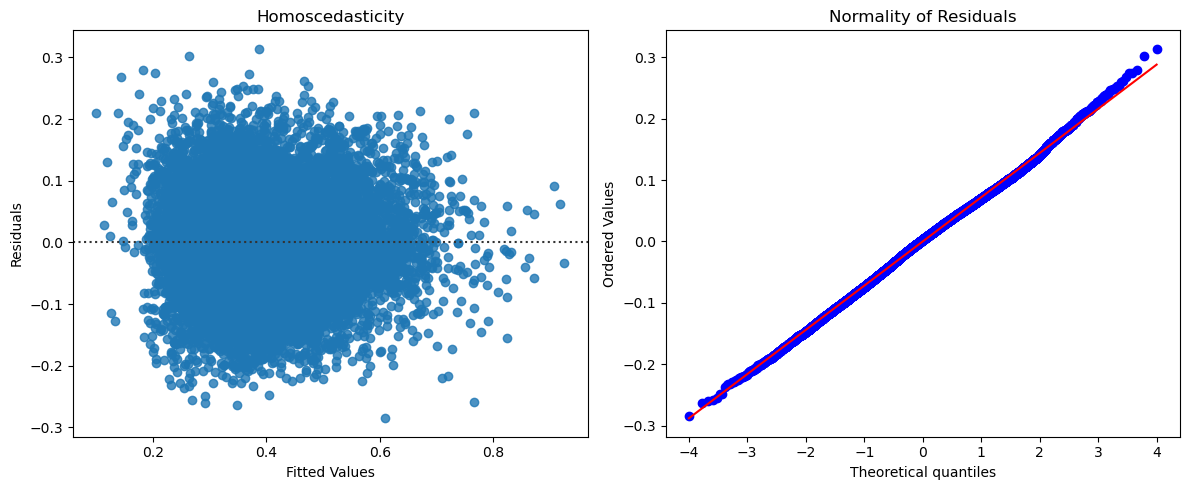

In [96]:
pred_val4 = results_it4.fittedvalues
resid4 = results_it4.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for homoscedasticity
sns.residplot(x=pred_val4, y=resid4, line_kws={'color': 'black'}, ax=ax1)
ax1.set_title('Homoscedasticity')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Q-Q plot for normality
stats.probplot(resid4, dist='norm', plot=ax2)
ax2.set_title('Normality of Residuals')

plt.tight_layout()
plt.show()

Compared to Iteration 2 & 3, there is no much difference in the above plots

**Assessment of Residuals: Histogram and QQ Plot for Continuous Variables in Linear Regression Assumptions**

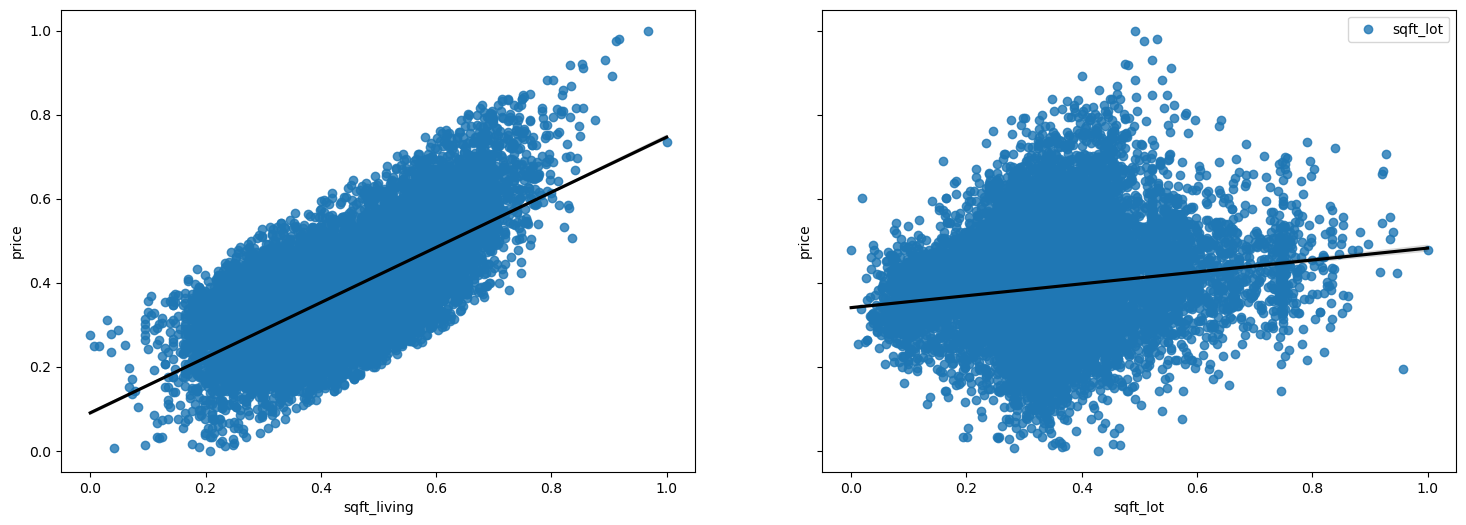

In [97]:
# Visualize the relationship between the predictors and the target using scatter plots
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'sqft_lot']):
    sns.regplot(x=channel, y='price', data=df_it3, ax=axs[idx], label=channel,
                line_kws={'color': 'black'})
plt.legend()
plt.show()

In [98]:
df_it3.columns

Index(['price', 'sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus'],
      dtype='object')

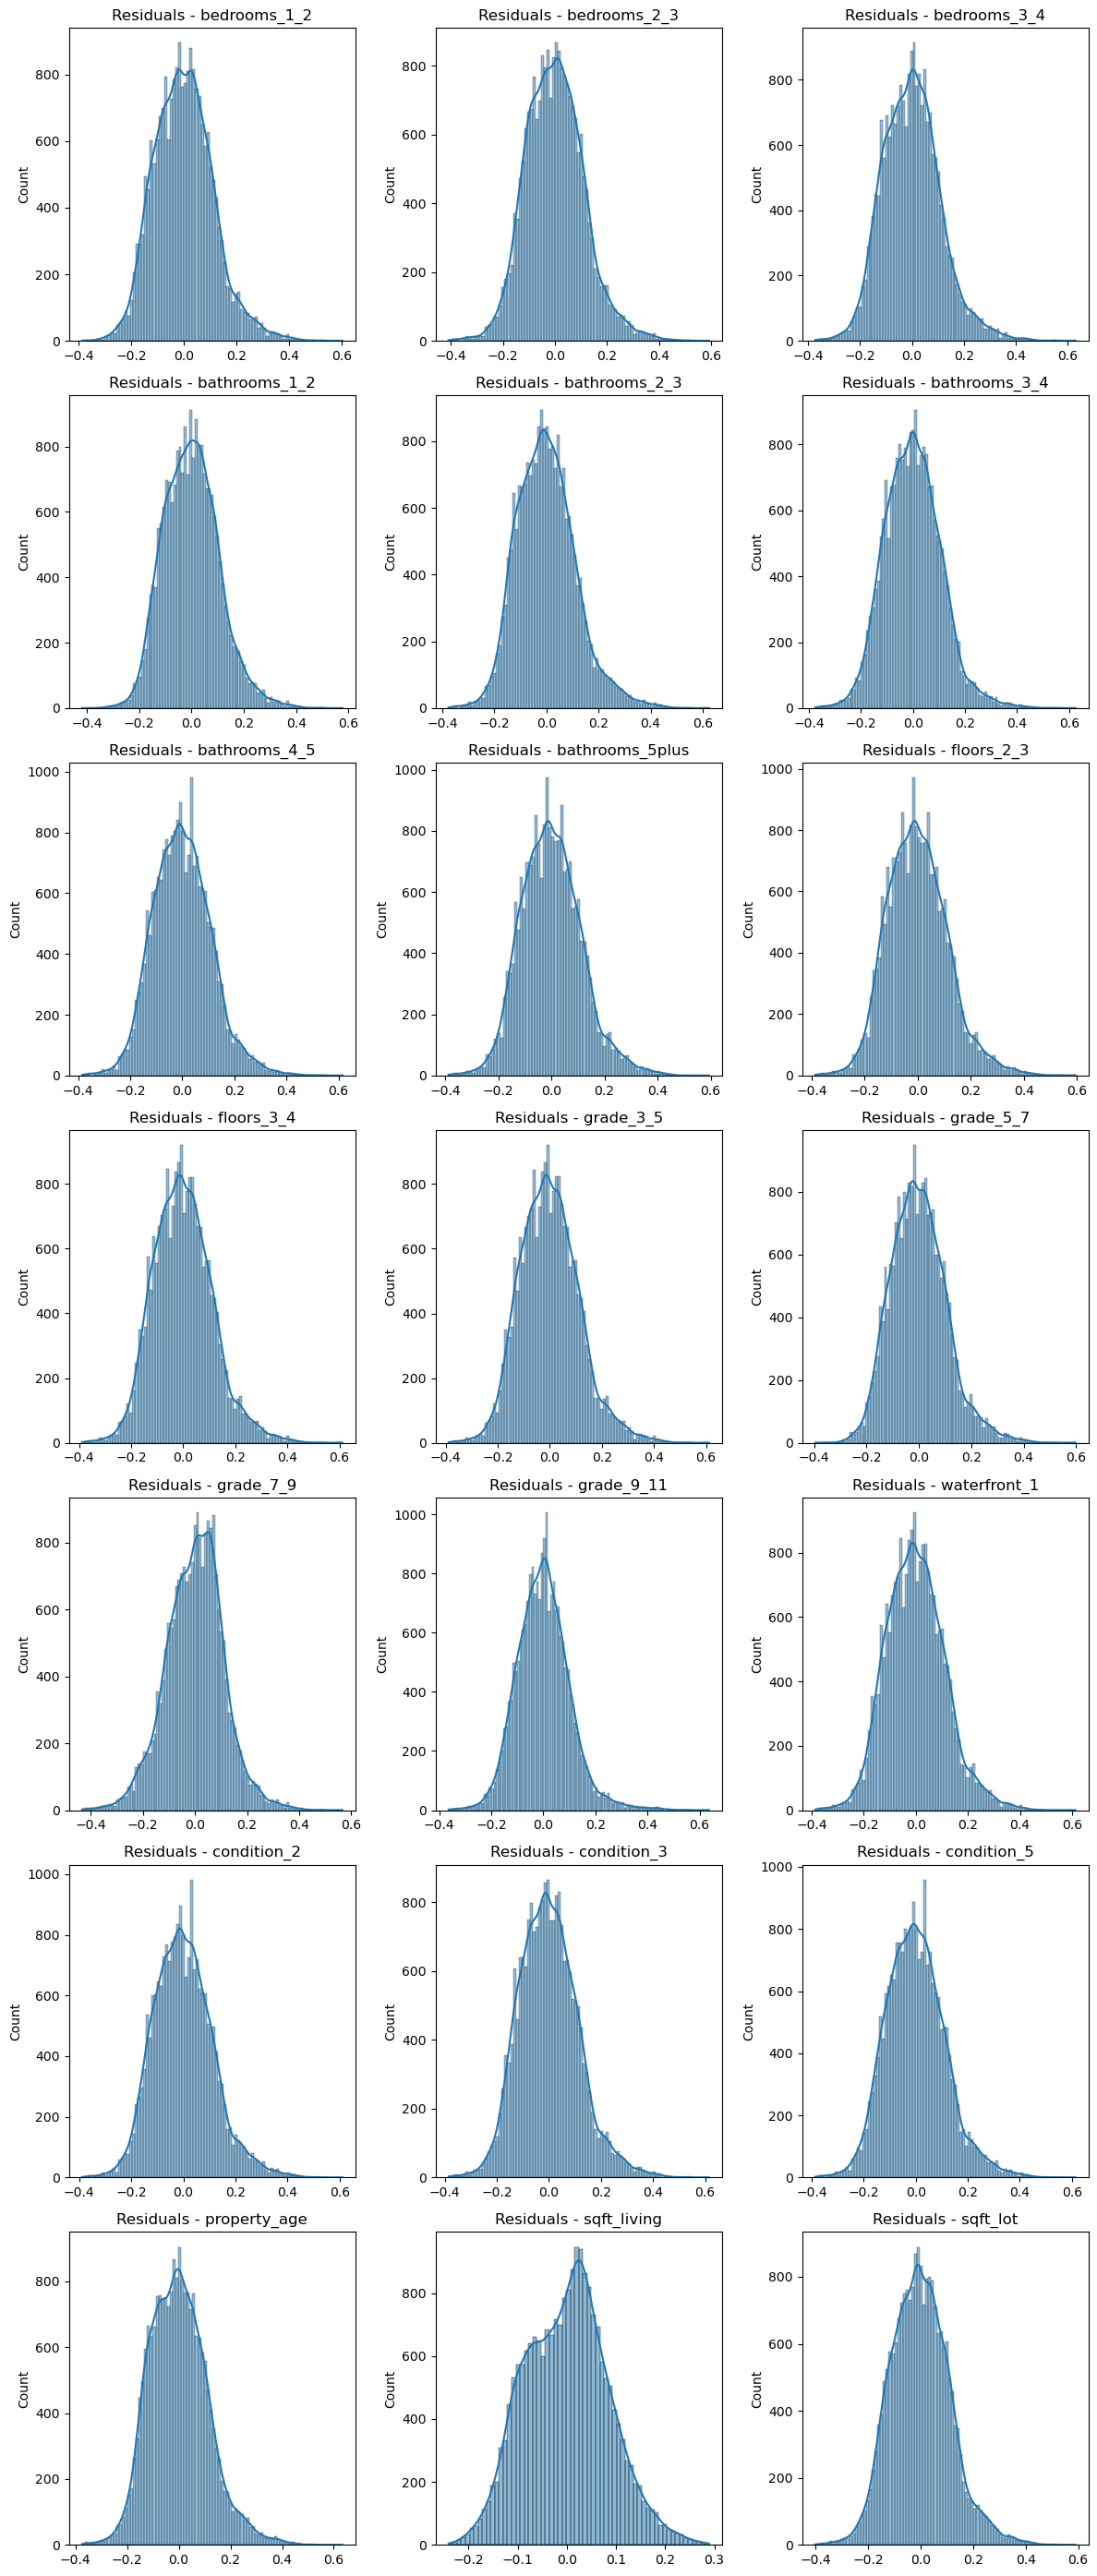

In [99]:
# Build the formulas
formulas = ['price ~ bedrooms_1_2','price ~ bedrooms_2_3', 'price ~ bedrooms_3_4',
            'price ~ bathrooms_1_2','price ~ bathrooms_2_3', 'price ~ bathrooms_3_4', 'price ~ bathrooms_4_5','price ~ bathrooms_5plus',
            'price ~ floors_2_3', 'price ~ floors_3_4',
            'price ~ grade_3_5', 'price ~ grade_5_7', 'price ~ grade_7_9', 'price ~ grade_9_11',
            'price ~ waterfront_1', 'price ~ condition_2', 'price ~ condition_3', 'price ~ condition_5',
            'price ~ property_age','price ~ sqft_living', 'price ~ sqft_lot']

# Create fitted models in one line
models = [smf.ols(formula=formula, data=df_it3).fit() for formula in formulas]

# Obtain the residuals for each model
residuals = [model.resid for model in models]

# Determine the number of rows and columns for the grid
num_plots = len(formulas)
num_rows = (num_plots + 2) // 3  # Add 2 to ensure enough space for the last row
num_cols = min(num_plots, 3)

# Create subplots for the histograms in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot histograms of residuals with KDE curve
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        sns.histplot(residuals[i], kde=True, ax=ax)
        ax.set_title('Residuals - ' + formulas[i].split('~')[1].strip())
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

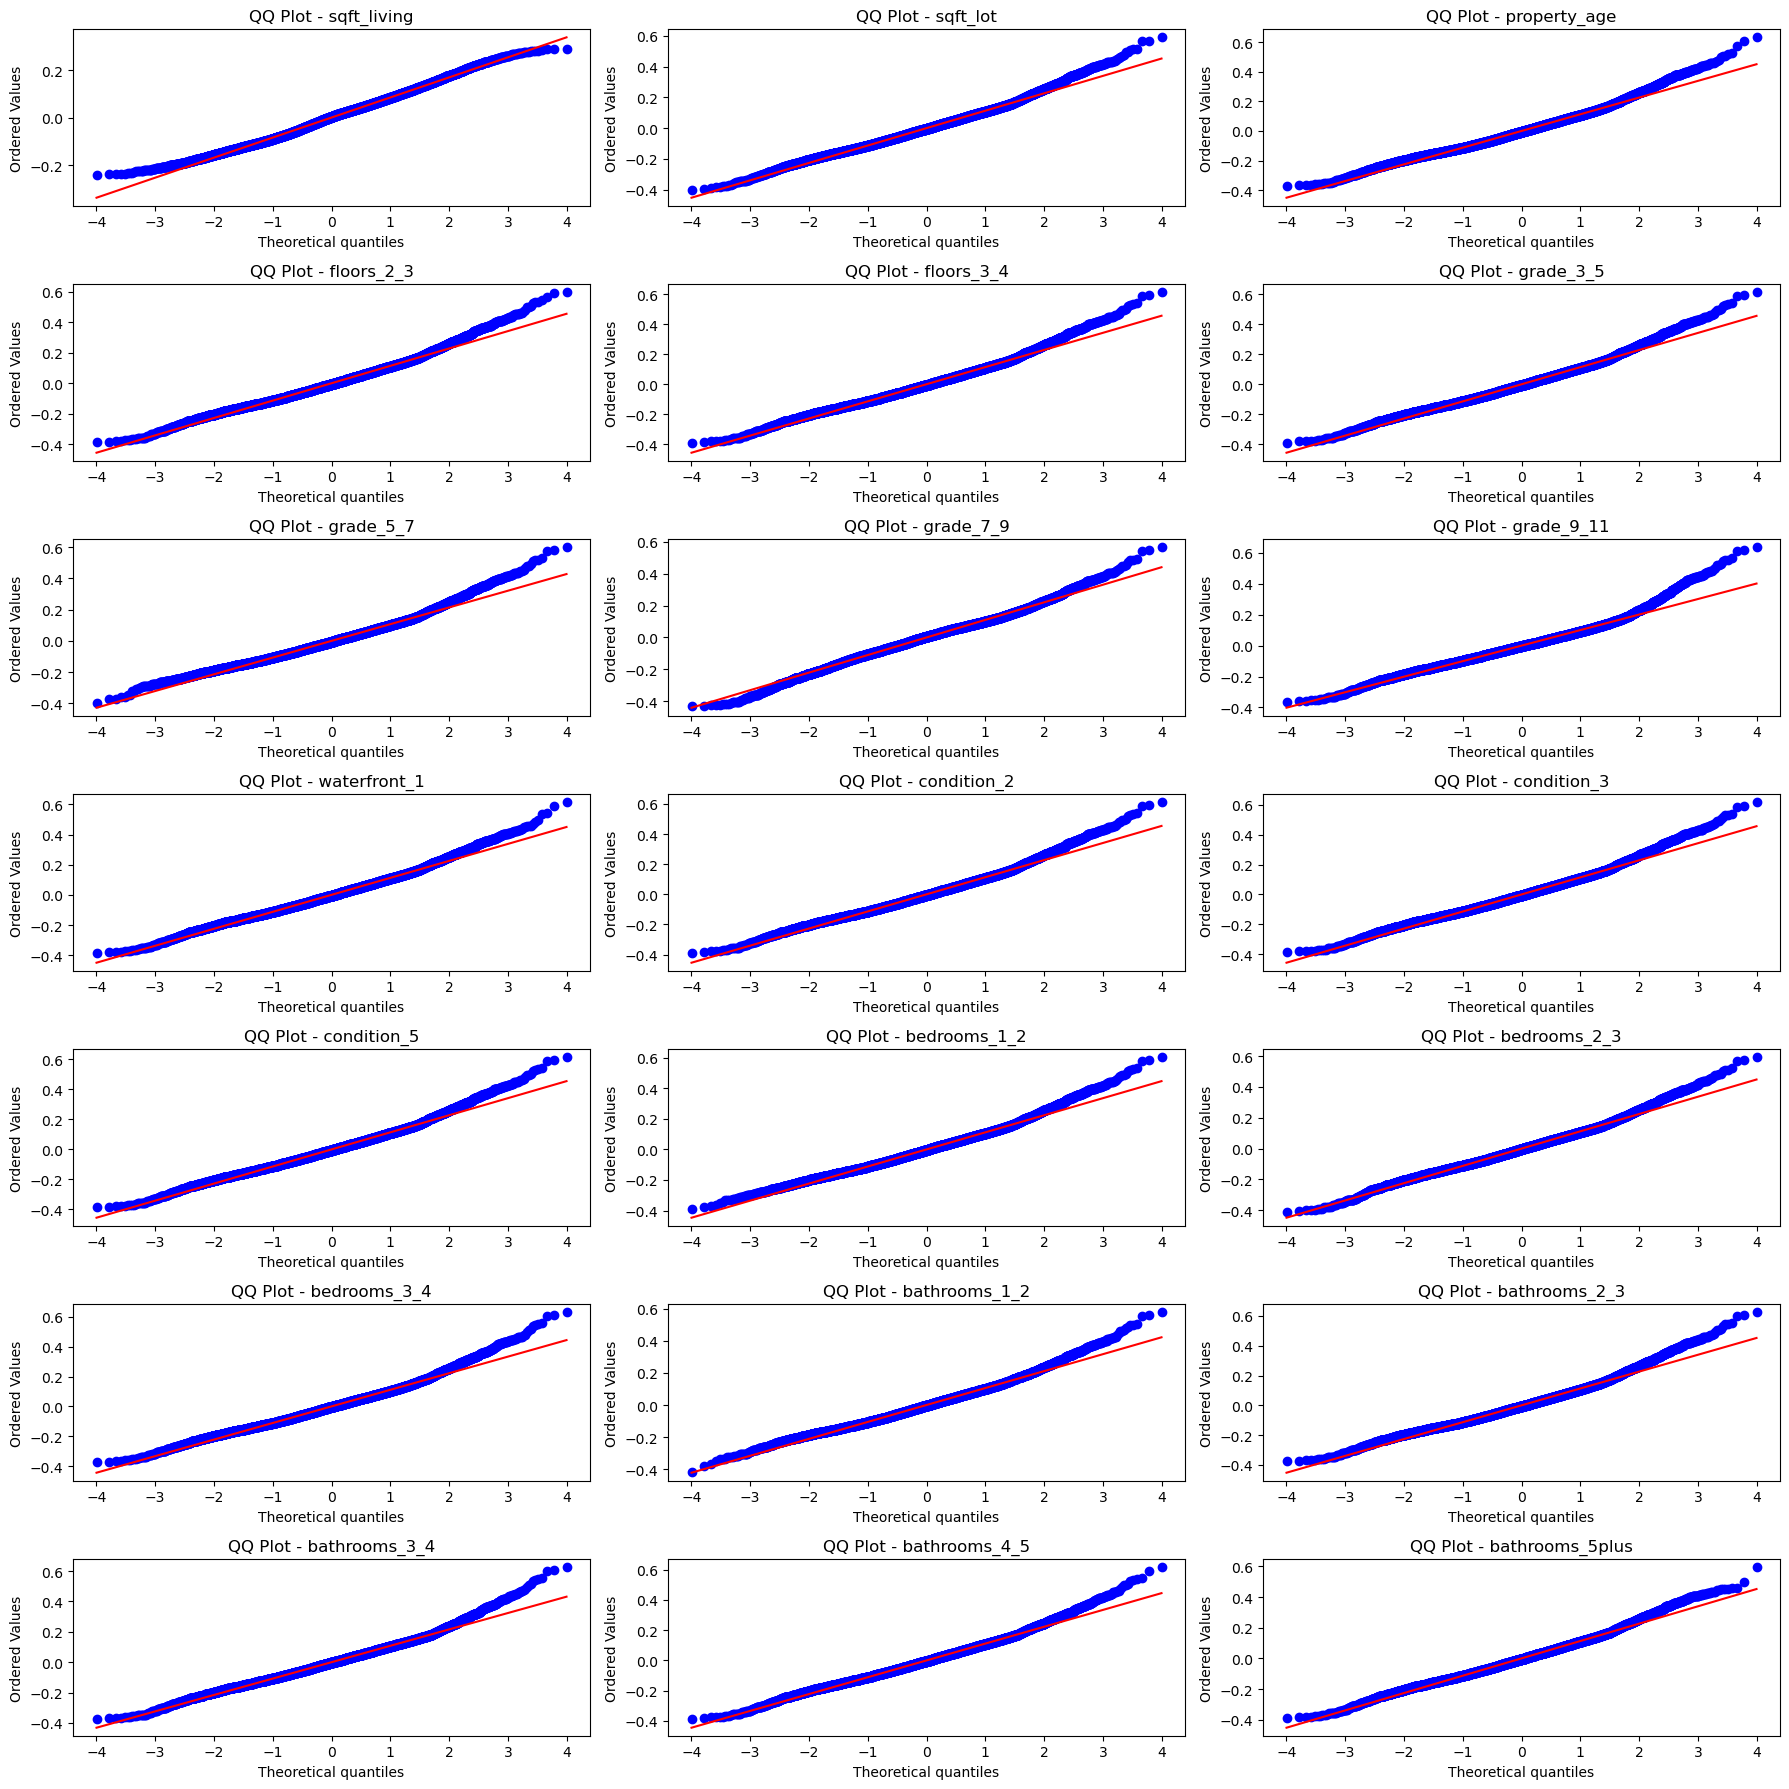

In [100]:
# Create subplots for the QQ plots in a grid layout
fig, axs = plt.subplots(7, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
                       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
                       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
                       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
                       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus']

# Plot QQ plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Create a fitted model in one line
        model = smf.ols(formula=f'price ~ {predictor_variables[i]}', data=df_it3).fit()
        # Obtain the residuals
        residuals = model.resid
        # Generate QQ plot
        stats.probplot(residuals, plot=ax)
        ax.set_title(f'QQ Plot - {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The histogram illustrates that the residuals follow a normal distribution or are relatively close to normal. Nevertheless, the QQ plot indicates slight deviations in both the tails.

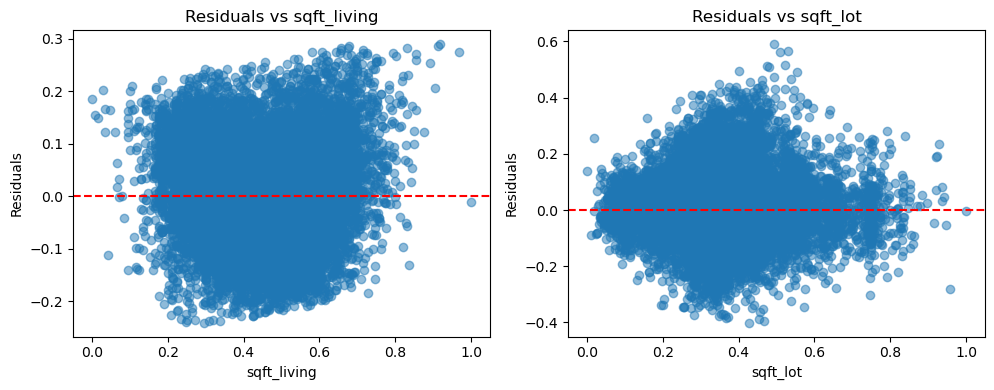

In [101]:
# Create subplots for the scatter plots in a grid layout
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.5)

# List of predictor variables
predictor_variables = ['sqft_living', 'sqft_lot']

# Plot scatter plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < len(predictor_variables):
        # Build the formula
        formula = f'price ~ {predictor_variables[i]}'
        # Create a fitted model
        model = smf.ols(formula=formula, data=df_it3).fit()
        # Obtain the residuals
        residuals = model.resid
        
        # Plot scatter plot
        ax.scatter(df_it3[predictor_variables[i]], residuals, alpha=0.5)
        ax.axhline(y=0, color='red', linestyle='--')
        ax.set_xlabel(predictor_variables[i])
        ax.set_ylabel('Residuals')
        ax.set_title(f'Residuals vs {predictor_variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The residuals for both 'sqft_living' and 'sqft_lot' continuous variables now exhibit indications of homoscedasticity.

After comparing the models from Iterations 1, 2, and 3, it appears that Iteration 4 provides a more reasonable representation. In this iteration, there is a positive impact on the price with an increase in the number of bedrooms. However, there are still some illogical representations concerning variables such as sqft_lot and grade. Additionally, the p-values for bathrooms_1_2, bathrooms_2_3, and floors_3_4 are greater than 0.05, indicating that these variables are not statistically significant in determining the house price.

## Preparation of dataset for Iteration 5

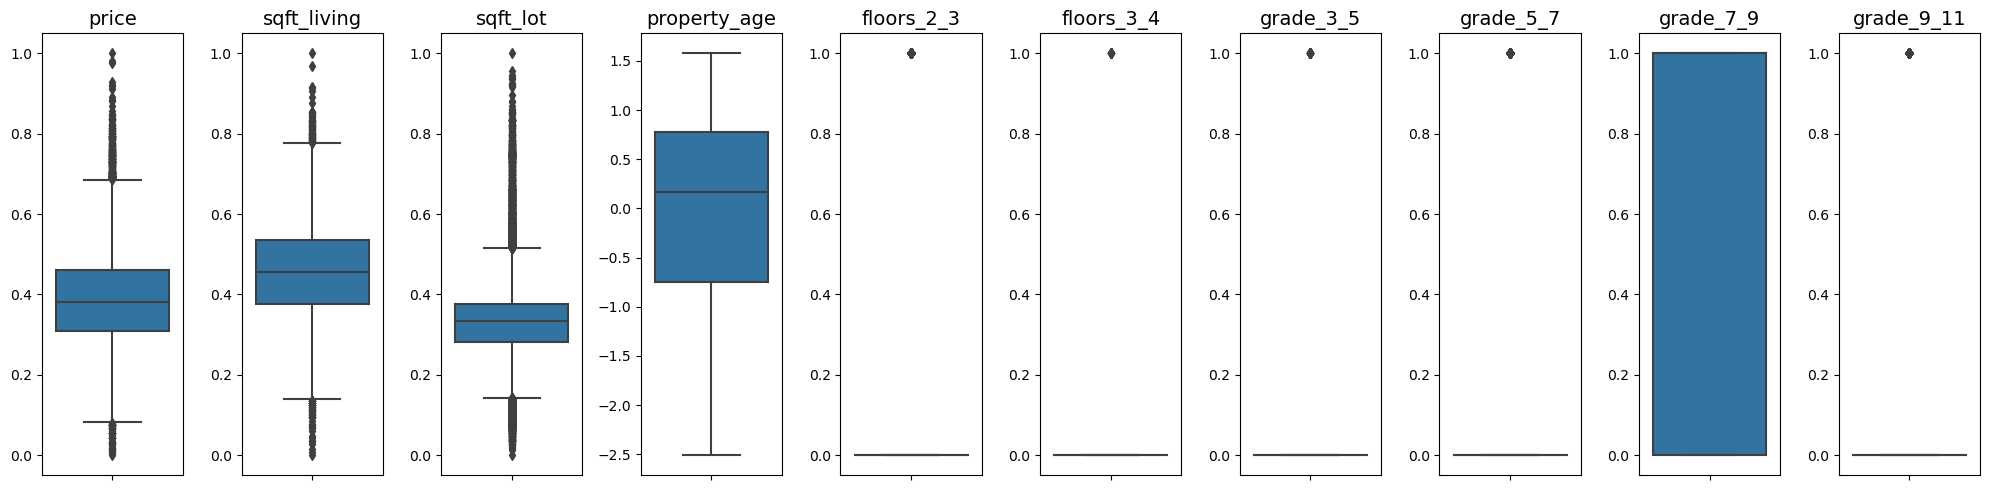

In [102]:
# Define the column groups
cols1 = ['price', 'sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
         'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11']

#Create subplots
fig, axes = plt.subplots(1, len(cols1), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols1):
    sns.boxplot(y=col, data=df_it3, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


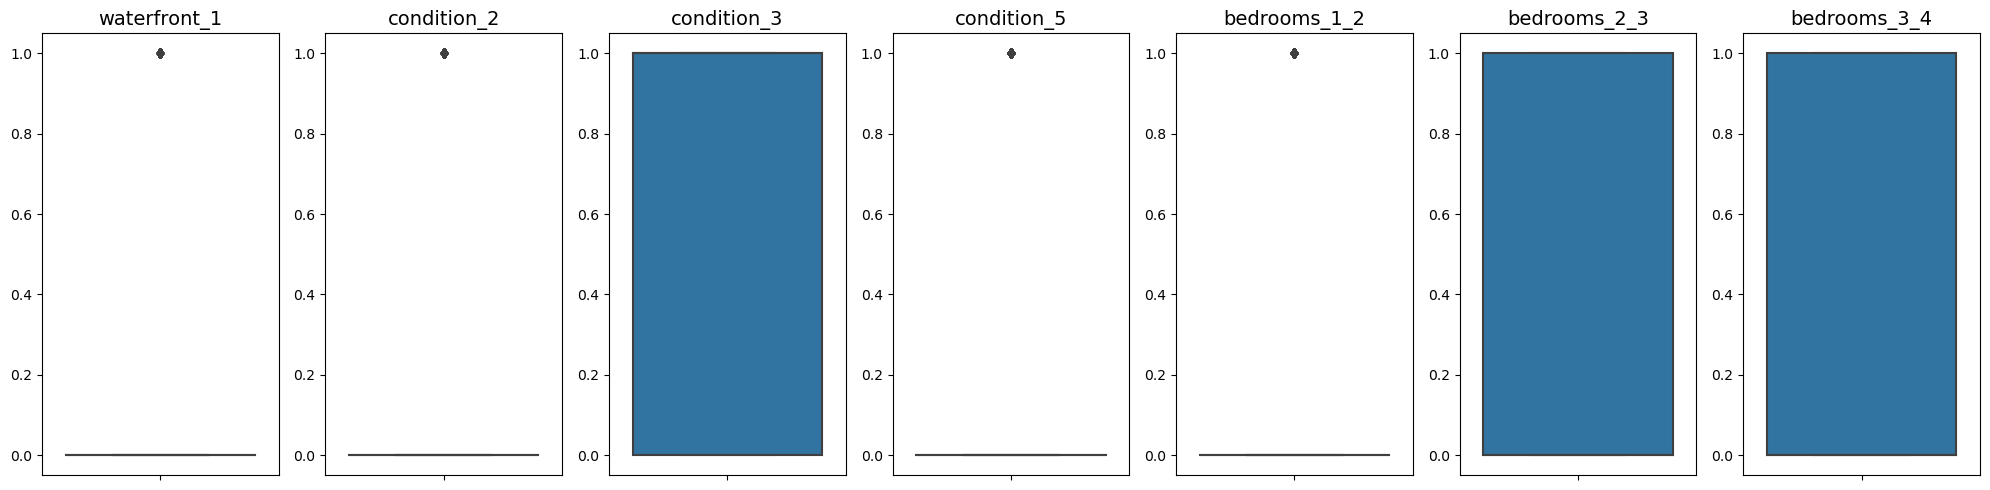

In [103]:
# Define the column groups
cols2 = ['waterfront_1', 'condition_2', 'condition_3', 'condition_5',
         'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4']
#Create subplots
fig, axes = plt.subplots(1, len(cols2), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols2):
    sns.boxplot(y=col, data=df_it3, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


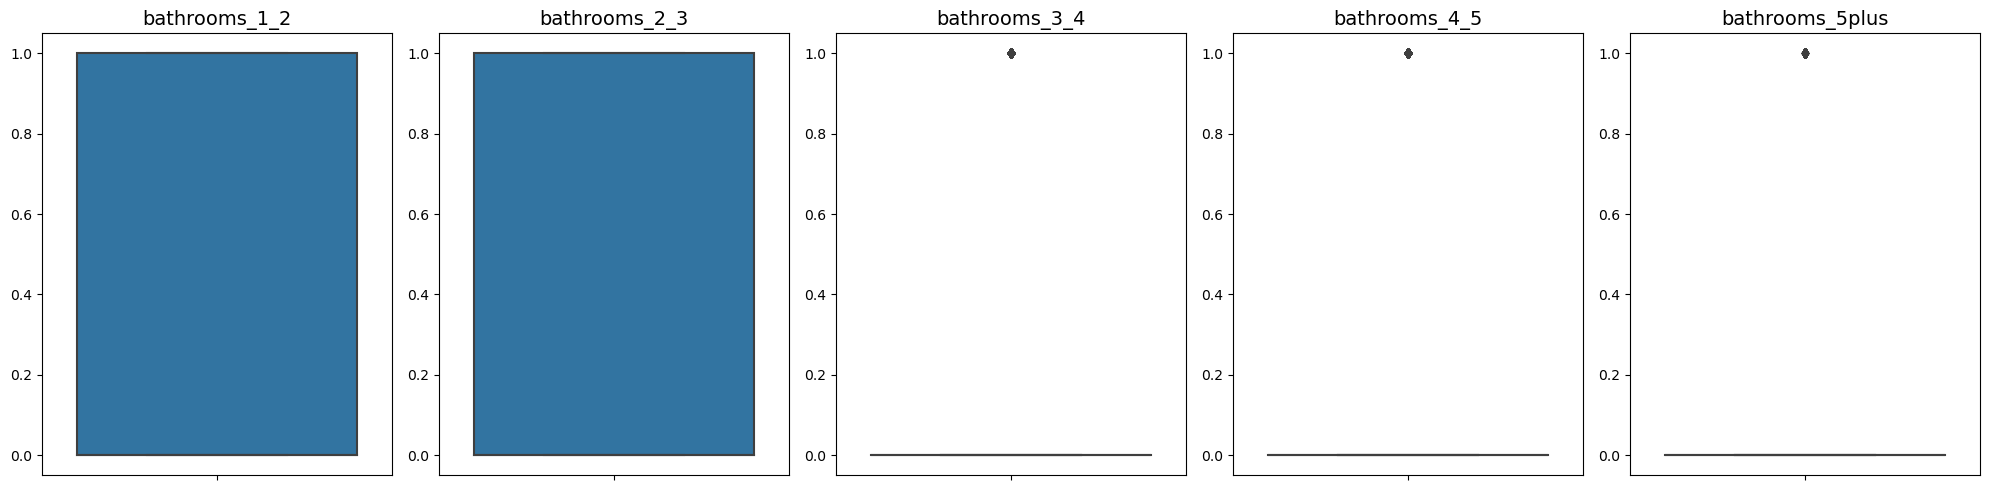

In [104]:
# Define the column groups
cols3 = ['bathrooms_1_2', 'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus']
#Create subplots
fig, axes = plt.subplots(1, len(cols3), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols3):
    sns.boxplot(y=col, data=df_it3, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [105]:
# Calculate IQR for 'price'
Q1_price = df_it3['price'].quantile(0.25)
Q3_price = df_it3['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate lower and upper bounds for 'price'
lower_bound_price = Q1_price - (1.5 * IQR_price)
upper_bound_price = Q3_price + (1.5 * IQR_price)

# Remove outliers for 'price'
df_it3 = df_it3[(df_it3['price'] >= lower_bound_price) & (df_it3['price'] <= upper_bound_price)]

# Calculate IQR for 'sqft_living'
Q1_sqft_living = df_it3['sqft_living'].quantile(0.25)
Q3_sqft_living = df_it3['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living

# Calculate lower and upper bounds for 'sqft_living'
lower_bound_sqft_living = Q1_sqft_living - (1.5 * IQR_sqft_living)
upper_bound_sqft_living = Q3_sqft_living + (1.5 * IQR_sqft_living)

# Remove outliers for 'sqft_living'
df_it3 = df_it3[(df_it3['sqft_living'] >= lower_bound_sqft_living) & (df_it3['sqft_living'] <= upper_bound_sqft_living)]

# Calculate IQR for 'sqft_lot'
Q1_sqft_lot = df_it3['sqft_lot'].quantile(0.25)
Q3_sqft_lot = df_it3['sqft_lot'].quantile(0.75)
IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot

# Calculate lower and upper bounds for 'sqft_lot'
lower_bound_sqft_lot = Q1_sqft_lot - (1.5 * IQR_sqft_lot)
upper_bound_sqft_lot = Q3_sqft_lot + (1.5 * IQR_sqft_lot)

# Remove outliers for 'sqft_lot'
df_it4 = df_it3[(df_it3['sqft_lot'] >= lower_bound_sqft_lot) & (df_it3['sqft_lot'] <= upper_bound_sqft_lot)]
df_it4 = df_it4.reset_index(drop=True)

In [106]:
df_it4.columns

Index(['price', 'sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus'],
      dtype='object')

## Iteration 5

In [107]:
# Fit the OLS model
X = df_it4[['sqft_living', 'sqft_lot', 'property_age', 'floors_2_3',
       'floors_3_4', 'grade_3_5', 'grade_5_7', 'grade_7_9', 'grade_9_11',
       'waterfront_1', 'condition_2', 'condition_3', 'condition_5',
       'bedrooms_1_2', 'bedrooms_2_3', 'bedrooms_3_4', 'bathrooms_1_2',
       'bathrooms_2_3', 'bathrooms_3_4', 'bathrooms_4_5', 'bathrooms_5plus']]
y = df_it4['price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_it5 = model.fit()
print(results_it5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1170.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:24:33   Log-Likelihood:                 22960.
No. Observations:               18639   AIC:                        -4.588e+04
Df Residuals:                   18617   BIC:                        -4.570e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3275      0.014     

**In an attempt to improve the Adjusted R-Squared, outliers were removed from the data. Surprisingly, the Adjusted R-Squared value actually decreased instead of increasing. Therefore, for further analysis, it is advisable to stick with the model derived through Iteration 4.**

## Regression Model Validation

In [108]:
df_it3.head()

price  sqft_living  sqft_lot  property_age  floors_2_3  floors_3_4  \
0  0.227669     0.322166  0.295858      0.690985           0           0   
1  0.420522     0.538392  0.326644      0.776422           0           0   
2  0.182099     0.203585  0.366664      1.109965           0           0   
3  0.445720     0.463123  0.280700      0.453223           0           0   
4  0.408883     0.420302  0.340224     -0.259658           0           0   

   grade_3_5  grade_5_7  grade_7_9  grade_9_11  ...  condition_3  condition_5  \
0          0          0          1           0  ...            1            0   
1          0          0          1           0  ...            1            0   
2          0          1          0           0  ...            1            0   
3          0          0          1           0  ...            0            1   
4          0          0          1           0  ...            1            0   

   bedrooms_1_2  bedrooms_2_3  bedrooms_3_4  bathrooms_1_2  bathrooms_2_3  \
0             0             1             0              1              0   
1             0             1             0              0              1   
2             1             0             0              1              0   
3             0             0             1              0              0   
4             0             1             0              0              1   

   bathrooms_3_4  bathrooms_4_5  bathrooms_5plus  
0              0              0                0  
1              0              0                0  
2              0              0                0  
3              1              0                0  
4              0              0                0  

[5 rows x 22 columns]

In [109]:
df_val = df_it3.copy()
df_val.head()

price  sqft_living  sqft_lot  property_age  floors_2_3  floors_3_4  \
0  0.227669     0.322166  0.295858      0.690985           0           0   
1  0.420522     0.538392  0.326644      0.776422           0           0   
2  0.182099     0.203585  0.366664      1.109965           0           0   
3  0.445720     0.463123  0.280700      0.453223           0           0   
4  0.408883     0.420302  0.340224     -0.259658           0           0   

   grade_3_5  grade_5_7  grade_7_9  grade_9_11  ...  condition_3  condition_5  \
0          0          0          1           0  ...            1            0   
1          0          0          1           0  ...            1            0   
2          0          1          0           0  ...            1            0   
3          0          0          1           0  ...            0            1   
4          0          0          1           0  ...            1            0   

   bedrooms_1_2  bedrooms_2_3  bedrooms_3_4  bathrooms_1_2  bathrooms_2_3  \
0             0             1             0              1              0   
1             0             1             0              0              1   
2             1             0             0              1              0   
3             0             0             1              0              0   
4             0             1             0              0              1   

   bathrooms_3_4  bathrooms_4_5  bathrooms_5plus  
0              0              0                0  
1              0              0                0  
2              0              0                0  
3              1              0                0  
4              0              0                0  

[5 rows x 22 columns]

The dataset df_it3 used for Model through Iteration 4 will undergo a train-test split. However, to preserve the original dataset, a copy named df_val has been made.

In [110]:
X = df_val.drop('price', axis=1)
y = df_val['price']

**Train-Test Split**

To evaluate the performance of a model and compare the Mean Squared Errors (MSEs) across different train-test split ratios, the dataset was split into the following proportions: 75-25, 80-20, 70-30, 60-40 and 90-10 in order to comparse the MSEs 

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train-Test Split: 75-25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_75 = mean_squared_error(y_train, y_hat_train)
test_mse_25 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_75:', train_mse_75)
print('Test Mean Squared Error_25: ', test_mse_25)
print()

# Train-Test Split: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_80 = mean_squared_error(y_train, y_hat_train)
test_mse_20 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_80:', train_mse_80)
print('Test Mean Squared Error_20: ', test_mse_20)
print()

# Train-Test Split: 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_70 = mean_squared_error(y_train, y_hat_train)
test_mse_30 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_70:', train_mse_70)
print('Test Mean Squared Error_30: ', test_mse_30)
print()

# Train-Test Split: 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.4)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_60 = mean_squared_error(y_train, y_hat_train)
test_mse_40 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_60:', train_mse_60)
print('Test Mean Squared Error_40: ', test_mse_40)
print()

# Train-Test Split: 90-10
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_90 = mean_squared_error(y_train, y_hat_train)
test_mse_10 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_90:', train_mse_90)
print('Test Mean Squared Error_10: ', test_mse_10)

Train Mean Squared Error_75: 0.005005402082584496
Test Mean Squared Error_25:  0.004840601209087691

Train Mean Squared Error_80: 0.004955344897971435
Test Mean Squared Error_20:  0.004998260252631664

Train Mean Squared Error_70: 0.004926770345424271
Test Mean Squared Error_30:  0.005053759332129583

Train Mean Squared Error_60: 0.004982296783894508
Test Mean Squared Error_40:  0.0049438867114954205

Train Mean Squared Error_90: 0.005002268690424024
Test Mean Squared Error_10:  0.004611883116608915


The observed results across all train-test split ratios indicate that the model performs well and exhibits good generalization to new, unseen data. This conclusion is supported by the following observations:

Train and Test MSE Proximity: The MSE values for both the training and testing sets are relatively close to each other across all the splits. This proximity suggests that the model is not overfitting to the training data and is able to generalize its predictions to the test data effectively.

Low MSE Values: Additionally, the MSE values obtained for both the training and testing sets are relatively low. This implies that the model's predictions are on average close to the actual values, indicating good accuracy and predictive performance.

By achieving both close and low MSE values, the model demonstrates robustness and reliability in capturing the underlying patterns and relationships within the data. These results provide confidence in the model's ability to make accurate predictions when applied to new, unseen data.

Overall, the consistent and favorable performance across the different train-test split ratios suggests that the model is well-suited for generalizing to unseen data and can be considered reliable for predicting house prices in this context.

## K-Fold Validation ##

In [112]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset the index of DataFrame X
X = X.reset_index(drop=True)

# Convert y to a NumPy array
y = y.values

# Define the number of folds (k)
k = 5

# Create an instance of the linear regression model
linreg = LinearRegression()

# Create an instance of the k-fold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the MSE values for train and test sets
train_mse_list = []
test_mse_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the current fold
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the train set
    linreg.fit(X_train, y_train)
    
    # Predict the target variable for train and test sets
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Calculate the mean squared error for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the MSE values to the lists
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Calculate the mean MSE values for train and test sets
mean_train_mse = np.mean(train_mse_list)
mean_test_mse = np.mean(test_mse_list)

# Print the mean MSE values for train and test sets
print('Mean Train Mean Squared Error:', mean_train_mse)
print('Mean Test Mean Squared Error:', mean_test_mse)

Mean Train Mean Squared Error: 0.004961007100593581
Mean Test Mean Squared Error: 0.004975772014779179


The mean train mean squared error and mean test mean squared error values obtained are quite close, indicating that the model is not overfitting. These low error values suggest that the linear regression model is performing well on both the training and test sets.

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Create the Linear Regression model
linreg = LinearRegression()

# Perform k-fold cross-validation with 10 folds
k = 10
mse_scores = cross_val_score(linreg, X, y, scoring='neg_mean_squared_error', cv=k)
mse_scores = -mse_scores  # Convert negative MSE scores to positive

# Print the MSE scores for each fold
for i in range(k):
    print(f"Fold {i+1} Mean Squared Error: {mse_scores[i]}")

# Calculate and print the average MSE across all folds
average_mse = mse_scores.mean()
print(f"Average Mean Squared Error: {average_mse}")

Fold 1 Mean Squared Error: 0.004973149576097387
Fold 2 Mean Squared Error: 0.005166072077042154
Fold 3 Mean Squared Error: 0.005054386047454581
Fold 4 Mean Squared Error: 0.005118245887336009
Fold 5 Mean Squared Error: 0.004990144745556468
Fold 6 Mean Squared Error: 0.005035535860939095
Fold 7 Mean Squared Error: 0.005052576116424745
Fold 8 Mean Squared Error: 0.005359870183078577
Fold 9 Mean Squared Error: 0.005071355852746721
Fold 10 Mean Squared Error: 0.004583298504233545
Average Mean Squared Error: 0.005040463485090929


The average mean squared error (MSE) obtained across the 10 folds of k-fold cross-validation is approximately 0.005. This average value gives you an overall measure of the model's performance across different train-test splits.

Examining the MSE values for each fold, we can see that they range from 0.004583 to 0.005359. These values indicate the performance of the model on each individual fold, representing the variation in performance across different subsets of the data.

Overall, a low average MSE value suggests that the linear regression model is performing well and is able to make accurate predictions on the target variable. 